In [39]:
import torch

torch.cuda.is_available()

True

In [40]:
import os
import numpy as np

subset_size = 10
# num_exps = 15
sc_options = ['False'] * 7

for sc_choice in sc_options:
    os.system(f"python main.py -model 'vgg16' -b 4 -bs 64 -s 1.16 -ds 'CIFAR100' -sn {subset_size} -sc '{sc_choice}'")

Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing vgg16 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 147/147 [00:00<00:00, 724.31it/s]


The quantization error of layer 0 is 88.67660522460938.
The relative quantization error of layer 0 is 0.01911812648177147.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 611.88it/s]


The quantization error of layer 1 is 940.3062133789062.
The relative quantization error of layer 1 is 0.05271701514720917.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1562.99it/s]


The quantization error of layer 2 is 247.2531280517578.
The relative quantization error of layer 2 is 0.056039780378341675.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 233.48it/s]


The quantization error of layer 3 is 3503.92041015625.
The relative quantization error of layer 3 is 0.1009669154882431.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 233.30it/s]


The quantization error of layer 4 is 1539.6884765625.
The relative quantization error of layer 4 is 0.051969245076179504.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 476.24it/s]


The quantization error of layer 5 is 609.913330078125.
The relative quantization error of layer 5 is 0.20109553635120392.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1536.41it/s]


The quantization error of layer 6 is 276.4471130371094.
The relative quantization error of layer 6 is 0.22164927423000336.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 253.88it/s]


The quantization error of layer 7 is 1068.9234619140625.
The relative quantization error of layer 7 is 0.22123801708221436.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 468.93it/s]


The quantization error of layer 8 is 900.6463623046875.
The relative quantization error of layer 8 is 0.25722452998161316.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1814.90it/s]


The quantization error of layer 9 is 584.6071166992188.
The relative quantization error of layer 9 is 0.270363986492157.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 253.53it/s]


The quantization error of layer 10 is 1636.24755859375.
The relative quantization error of layer 10 is 0.23104563355445862.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 272.58it/s]


The quantization error of layer 11 is 1717.3265380859375.
The relative quantization error of layer 11 is 0.3034229576587677.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1765.43it/s]


The quantization error of layer 12 is 1193.0369873046875.
The relative quantization error of layer 12 is 0.29905495047569275.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 852.04it/s]


The quantization error of layer 13 is 1517.9783935546875.
The relative quantization error of layer 13 is 0.21816101670265198.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 75.42it/s]


The quantization error of layer 14 is 2061.599853515625.
The relative quantization error of layer 14 is 0.29384076595306396.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1590.02it/s]


The quantization error of layer 15 is 2062.436279296875.
The relative quantization error of layer 15 is 0.26823729276657104.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1751.10it/s]


The quantization error of layer 16 is 543.7785034179688.
The relative quantization error of layer 16 is 0.2453145682811737.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 849.80it/s]


The quantization error of layer 17 is 1211.7593994140625.
The relative quantization error of layer 17 is 0.38789188861846924.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1697.42it/s]


The quantization error of layer 18 is 1774.4183349609375.
The relative quantization error of layer 18 is 0.2958214282989502.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1827.95it/s]


The quantization error of layer 19 is 366.7424621582031.
The relative quantization error of layer 19 is 0.25464165210723877.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 848.32it/s]


The quantization error of layer 20 is 1242.260986328125.
The relative quantization error of layer 20 is 0.30474305152893066.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1669.78it/s]


The quantization error of layer 21 is 1965.01025390625.
The relative quantization error of layer 21 is 0.3224579691886902.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1828.63it/s]


The quantization error of layer 22 is 447.1703186035156.
The relative quantization error of layer 22 is 0.27158689498901367.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 804.11it/s]


The quantization error of layer 23 is 1005.3828125.
The relative quantization error of layer 23 is 0.3658970892429352.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1280.37it/s]


The quantization error of layer 24 is 3338.917724609375.
The relative quantization error of layer 24 is 0.3600340783596039.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1842.32it/s]


The quantization error of layer 25 is 628.3137817382812.
The relative quantization error of layer 25 is 0.3197019398212433.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1311.18it/s]


The quantization error of layer 26 is 1366.052734375.
The relative quantization error of layer 26 is 0.3722333312034607.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:01<00:00, 505.07it/s]


The quantization error of layer 27 is 3434.38818359375.
The relative quantization error of layer 27 is 0.3527572453022003.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1843.94it/s]


The quantization error of layer 28 is 1326.8040771484375.
The relative quantization error of layer 28 is 0.329397976398468.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1847.94it/s]


The quantization error of layer 29 is 268.0052490234375.
The relative quantization error of layer 29 is 0.17635121941566467.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1315.95it/s]


The quantization error of layer 30 is 965.2799682617188.
The relative quantization error of layer 30 is 0.41558775305747986.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1832.53it/s]


The quantization error of layer 31 is 1497.247802734375.
The relative quantization error of layer 31 is 0.3539978563785553.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1788.73it/s]


The quantization error of layer 32 is 294.76409912109375.
The relative quantization error of layer 32 is 0.21635040640830994.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1288.92it/s]


The quantization error of layer 33 is 865.872802734375.
The relative quantization error of layer 33 is 0.4663301408290863.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1823.97it/s]


The quantization error of layer 34 is 1660.9522705078125.
The relative quantization error of layer 34 is 0.40623295307159424.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1833.90it/s]


The quantization error of layer 35 is 245.525390625.
The relative quantization error of layer 35 is 0.19956836104393005.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1303.23it/s]


The quantization error of layer 36 is 1022.259033203125.
The relative quantization error of layer 36 is 0.4960893988609314.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1839.27it/s]


The quantization error of layer 37 is 1693.4764404296875.
The relative quantization error of layer 37 is 0.3918311893939972.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1839.83it/s]


The quantization error of layer 38 is 202.1611328125.
The relative quantization error of layer 38 is 0.2065420001745224.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1302.21it/s]


The quantization error of layer 39 is 1338.8740234375.
The relative quantization error of layer 39 is 0.5046133399009705.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1843.24it/s]


The quantization error of layer 40 is 1826.6551513671875.
The relative quantization error of layer 40 is 0.42689189314842224.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1845.11it/s]


The quantization error of layer 41 is 176.11752319335938.
The relative quantization error of layer 41 is 0.2189737856388092.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1307.50it/s]


The quantization error of layer 42 is 1385.435546875.
The relative quantization error of layer 42 is 0.527224063873291.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1749.99it/s]


The quantization error of layer 43 is 2494.15380859375.
The relative quantization error of layer 43 is 0.444347620010376.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1838.80it/s]


The quantization error of layer 44 is 152.49513244628906.
The relative quantization error of layer 44 is 0.2009885460138321.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1681.54it/s]


The quantization error of layer 45 is 894.6072387695312.
The relative quantization error of layer 45 is 0.4191319942474365.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 877.37it/s]


The quantization error of layer 46 is 2166.607177734375.
The relative quantization error of layer 46 is 0.4609715938568115.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



  8%|▊         | 368/4608 [00:00<00:02, 1835.71it/s]

The quantization error of layer 47 is 409.1153564453125.
The relative quantization error of layer 47 is 0.3894883990287781.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1845.48it/s]


The quantization error of layer 48 is 108.141357421875.
The relative quantization error of layer 48 is 0.0921451523900032.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1711.02it/s]


The quantization error of layer 49 is 520.2020263671875.
The relative quantization error of layer 49 is 0.6542603373527527.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1846.59it/s]


The quantization error of layer 50 is 449.0841979980469.
The relative quantization error of layer 50 is 0.24890604615211487.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1859.64it/s]


The quantization error of layer 51 is 63.28251647949219.
The relative quantization error of layer 51 is 0.13510820269584656.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1758.71it/s]


The quantization error of layer 52 is 108.30496215820312.
The relative quantization error of layer 52 is 0.7596396803855896.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1854.98it/s]


The quantization error of layer 53 is 25.402511596679688.
The relative quantization error of layer 53 is 0.15534283220767975.


Time used for quantization: 0:01:00.098140


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of vgg16 is 0.887.
Top-5 accuracy of vgg16 is 0.989.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.72it/s]


Top-1 accuracy of quantized vgg16 is 0.944.
Top-5 accuracy of quantized vgg16 is 0.991.

Time used for evaluation: 0:00:04.304084

Sparsity: Org: 0.0, Quant: 0.4536
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing vgg16 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 147/147 [00:00<00:00, 800.52it/s]


The quantization error of layer 0 is 80.85393524169922.
The relative quantization error of layer 0 is 0.01829959638416767.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 699.43it/s]


The quantization error of layer 1 is 894.8817138671875.
The relative quantization error of layer 1 is 0.050224341452121735.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1748.56it/s]


The quantization error of layer 2 is 255.0712432861328.
The relative quantization error of layer 2 is 0.057021964341402054.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 204.51it/s]


The quantization error of layer 3 is 3472.736328125.
The relative quantization error of layer 3 is 0.10273605585098267.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 198.30it/s]


The quantization error of layer 4 is 1405.674072265625.
The relative quantization error of layer 4 is 0.048802006989717484.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 479.10it/s]


The quantization error of layer 5 is 585.8372802734375.
The relative quantization error of layer 5 is 0.20077857375144958.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1682.19it/s]


The quantization error of layer 6 is 275.0473937988281.
The relative quantization error of layer 6 is 0.23831212520599365.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 211.51it/s]


The quantization error of layer 7 is 1019.5071411132812.
The relative quantization error of layer 7 is 0.22046463191509247.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 459.48it/s]


The quantization error of layer 8 is 900.71240234375.
The relative quantization error of layer 8 is 0.26464149355888367.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1828.50it/s]


The quantization error of layer 9 is 559.8687744140625.
The relative quantization error of layer 9 is 0.278467059135437.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 209.44it/s]


The quantization error of layer 10 is 1581.599365234375.
The relative quantization error of layer 10 is 0.24015925824642181.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 278.24it/s]


The quantization error of layer 11 is 1720.67578125.
The relative quantization error of layer 11 is 0.30799806118011475.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1842.57it/s]


The quantization error of layer 12 is 1166.0831298828125.
The relative quantization error of layer 12 is 0.3038090765476227.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 807.32it/s]


The quantization error of layer 13 is 1557.3592529296875.
The relative quantization error of layer 13 is 0.22293587028980255.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 75.36it/s]


The quantization error of layer 14 is 2030.025634765625.
The relative quantization error of layer 14 is 0.29939648509025574.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1688.94it/s]


The quantization error of layer 15 is 1970.3760986328125.
The relative quantization error of layer 15 is 0.2768745720386505.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1833.22it/s]


The quantization error of layer 16 is 505.5555419921875.
The relative quantization error of layer 16 is 0.2357569932937622.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 846.51it/s]


The quantization error of layer 17 is 1119.5286865234375.
The relative quantization error of layer 17 is 0.3854140639305115.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1648.08it/s]


The quantization error of layer 18 is 1781.2833251953125.
The relative quantization error of layer 18 is 0.30775073170661926.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1830.22it/s]


The quantization error of layer 19 is 368.12042236328125.
The relative quantization error of layer 19 is 0.25974759459495544.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 846.47it/s]


The quantization error of layer 20 is 1254.9337158203125.
The relative quantization error of layer 20 is 0.3100539743900299.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1682.45it/s]


The quantization error of layer 21 is 2023.406005859375.
The relative quantization error of layer 21 is 0.3376784026622772.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1833.25it/s]


The quantization error of layer 22 is 442.02484130859375.
The relative quantization error of layer 22 is 0.2822003662586212.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 848.44it/s]


The quantization error of layer 23 is 1033.12060546875.
The relative quantization error of layer 23 is 0.39187487959861755.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1272.17it/s]


The quantization error of layer 24 is 3344.087890625.
The relative quantization error of layer 24 is 0.37285107374191284.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1833.23it/s]


The quantization error of layer 25 is 611.136474609375.
The relative quantization error of layer 25 is 0.3260546326637268.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1303.33it/s]


The quantization error of layer 26 is 1378.777587890625.
The relative quantization error of layer 26 is 0.3767983615398407.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:01<00:00, 511.05it/s]


The quantization error of layer 27 is 3425.2333984375.
The relative quantization error of layer 27 is 0.35818129777908325.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1815.66it/s]


The quantization error of layer 28 is 1303.70068359375.
The relative quantization error of layer 28 is 0.33352264761924744.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1823.47it/s]


The quantization error of layer 29 is 273.06494140625.
The relative quantization error of layer 29 is 0.19041426479816437.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1293.59it/s]


The quantization error of layer 30 is 1010.9307250976562.
The relative quantization error of layer 30 is 0.4564160704612732.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1807.55it/s]


The quantization error of layer 31 is 1514.5989990234375.
The relative quantization error of layer 31 is 0.3647482693195343.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1833.34it/s]


The quantization error of layer 32 is 292.01123046875.
The relative quantization error of layer 32 is 0.2209433615207672.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1268.02it/s]


The quantization error of layer 33 is 888.1016235351562.
The relative quantization error of layer 33 is 0.47726231813430786.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1810.92it/s]


The quantization error of layer 34 is 1698.12890625.
The relative quantization error of layer 34 is 0.3982262909412384.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1832.10it/s]


The quantization error of layer 35 is 244.96726989746094.
The relative quantization error of layer 35 is 0.20369528234004974.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1305.17it/s]


The quantization error of layer 36 is 1078.4139404296875.
The relative quantization error of layer 36 is 0.5282115936279297.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1809.20it/s]


The quantization error of layer 37 is 1754.6986083984375.
The relative quantization error of layer 37 is 0.40999722480773926.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1817.18it/s]


The quantization error of layer 38 is 210.4062957763672.
The relative quantization error of layer 38 is 0.21233190596103668.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1288.71it/s]


The quantization error of layer 39 is 1338.347900390625.
The relative quantization error of layer 39 is 0.5144878029823303.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1808.43it/s]


The quantization error of layer 40 is 1814.637939453125.
The relative quantization error of layer 40 is 0.43682917952537537.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1829.14it/s]


The quantization error of layer 41 is 184.70510864257812.
The relative quantization error of layer 41 is 0.23102211952209473.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1292.98it/s]


The quantization error of layer 42 is 1431.0367431640625.
The relative quantization error of layer 42 is 0.5270217657089233.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1729.89it/s]


The quantization error of layer 43 is 2521.2431640625.
The relative quantization error of layer 43 is 0.4573308527469635.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1826.71it/s]


The quantization error of layer 44 is 158.0026092529297.
The relative quantization error of layer 44 is 0.20296324789524078.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1707.78it/s]


The quantization error of layer 45 is 912.9776611328125.
The relative quantization error of layer 45 is 0.4160662591457367.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 872.71it/s]


The quantization error of layer 46 is 2172.55419921875.
The relative quantization error of layer 46 is 0.46740350127220154.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1824.59it/s]


The quantization error of layer 47 is 415.1411437988281.
The relative quantization error of layer 47 is 0.37496888637542725.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1823.88it/s]


The quantization error of layer 48 is 105.42982482910156.
The relative quantization error of layer 48 is 0.1163279265165329.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1707.28it/s]


The quantization error of layer 49 is 536.2277221679688.
The relative quantization error of layer 49 is 0.6677123308181763.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1830.93it/s]


The quantization error of layer 50 is 483.0294494628906.
The relative quantization error of layer 50 is 0.24460789561271667.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1850.59it/s]


The quantization error of layer 51 is 94.54096221923828.
The relative quantization error of layer 51 is 0.1409349888563156.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1741.83it/s]


The quantization error of layer 52 is 109.4556655883789.
The relative quantization error of layer 52 is 0.7900533080101013.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1825.11it/s]


The quantization error of layer 53 is 39.13304901123047.
The relative quantization error of layer 53 is 0.24085666239261627.


Time used for quantization: 0:01:00.158803


Evaluting the original model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.78it/s]


Top-1 accuracy of vgg16 is 0.855.
Top-5 accuracy of vgg16 is 0.984.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.89it/s]


Top-1 accuracy of quantized vgg16 is 0.951.
Top-5 accuracy of quantized vgg16 is 0.995.

Time used for evaluation: 0:00:04.189124

Sparsity: Org: 0.0, Quant: 0.453
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing vgg16 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 147/147 [00:00<00:00, 801.43it/s]


The quantization error of layer 0 is 78.35137176513672.
The relative quantization error of layer 0 is 0.01819893904030323.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 512.92it/s]


The quantization error of layer 1 is 900.23193359375.
The relative quantization error of layer 1 is 0.05108828842639923.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2681.49it/s]


The quantization error of layer 2 is 249.38197326660156.
The relative quantization error of layer 2 is 0.0533231683075428.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 212.33it/s]


The quantization error of layer 3 is 3349.34033203125.
The relative quantization error of layer 3 is 0.10219639539718628.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 229.27it/s]


The quantization error of layer 4 is 1372.387939453125.
The relative quantization error of layer 4 is 0.04628856107592583.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 522.80it/s]


The quantization error of layer 5 is 573.8430786132812.
The relative quantization error of layer 5 is 0.199172705411911.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2559.11it/s]


The quantization error of layer 6 is 260.2993469238281.
The relative quantization error of layer 6 is 0.23202726244926453.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 229.31it/s]


The quantization error of layer 7 is 1055.9757080078125.
The relative quantization error of layer 7 is 0.22906573116779327.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 522.68it/s]


The quantization error of layer 8 is 872.6992797851562.
The relative quantization error of layer 8 is 0.2642393410205841.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2650.28it/s]


The quantization error of layer 9 is 580.1952514648438.
The relative quantization error of layer 9 is 0.27853724360466003.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 234.14it/s]


The quantization error of layer 10 is 1626.1666259765625.
The relative quantization error of layer 10 is 0.24119359254837036.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



 46%|████▋     | 533/1152 [00:00<00:00, 2662.95it/s]

The quantization error of layer 11 is 1673.1031494140625.
The relative quantization error of layer 11 is 0.3078515827655792.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2652.52it/s]


The quantization error of layer 12 is 1201.287109375.
The relative quantization error of layer 12 is 0.30662569403648376.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 858.87it/s]


The quantization error of layer 13 is 1477.3572998046875.
The relative quantization error of layer 13 is 0.214580237865448.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 76.31it/s]


The quantization error of layer 14 is 2019.0970458984375.
The relative quantization error of layer 14 is 0.29665258526802063.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2075.01it/s]


The quantization error of layer 15 is 1984.8348388671875.
The relative quantization error of layer 15 is 0.2723388671875.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2652.14it/s]


The quantization error of layer 16 is 498.8657531738281.
The relative quantization error of layer 16 is 0.23247718811035156.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 751.57it/s]


The quantization error of layer 17 is 1141.354736328125.
The relative quantization error of layer 17 is 0.3863257169723511.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2073.23it/s]


The quantization error of layer 18 is 1763.2413330078125.
The relative quantization error of layer 18 is 0.2982591688632965.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2643.68it/s]


The quantization error of layer 19 is 354.6940612792969.
The relative quantization error of layer 19 is 0.250746488571167.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 904.64it/s]


The quantization error of layer 20 is 1228.690673828125.
The relative quantization error of layer 20 is 0.30738088488578796.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2068.45it/s]


The quantization error of layer 21 is 1923.6055908203125.
The relative quantization error of layer 21 is 0.3283490538597107.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2629.67it/s]


The quantization error of layer 22 is 429.9677734375.
The relative quantization error of layer 22 is 0.27463147044181824.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 906.70it/s]


The quantization error of layer 23 is 984.8569946289062.
The relative quantization error of layer 23 is 0.3969762623310089.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1481.78it/s]


The quantization error of layer 24 is 3289.951904296875.
The relative quantization error of layer 24 is 0.3642725646495819.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2637.96it/s]


The quantization error of layer 25 is 611.5709838867188.
The relative quantization error of layer 25 is 0.3249637484550476.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1523.34it/s]


The quantization error of layer 26 is 1365.746337890625.
The relative quantization error of layer 26 is 0.3705294728279114.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 525.49it/s]


The quantization error of layer 27 is 3385.222900390625.
The relative quantization error of layer 27 is 0.35714998841285706.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2624.27it/s]


The quantization error of layer 28 is 1319.583984375.
The relative quantization error of layer 28 is 0.3312188386917114.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2638.15it/s]


The quantization error of layer 29 is 260.3865661621094.
The relative quantization error of layer 29 is 0.1801983267068863.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1515.28it/s]


The quantization error of layer 30 is 995.502197265625.
The relative quantization error of layer 30 is 0.43858712911605835.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2619.34it/s]


The quantization error of layer 31 is 1494.979736328125.
The relative quantization error of layer 31 is 0.3637838065624237.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2642.19it/s]


The quantization error of layer 32 is 291.3187561035156.
The relative quantization error of layer 32 is 0.22060319781303406.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1505.91it/s]


The quantization error of layer 33 is 868.1851196289062.
The relative quantization error of layer 33 is 0.4680511951446533.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2606.95it/s]


The quantization error of layer 34 is 1618.5189208984375.
The relative quantization error of layer 34 is 0.4071504771709442.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2617.44it/s]


The quantization error of layer 35 is 248.2058868408203.
The relative quantization error of layer 35 is 0.2079121619462967.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1484.94it/s]


The quantization error of layer 36 is 1032.2935791015625.
The relative quantization error of layer 36 is 0.5173187255859375.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2631.32it/s]


The quantization error of layer 37 is 1759.85400390625.
The relative quantization error of layer 37 is 0.43460148572921753.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2644.63it/s]


The quantization error of layer 38 is 208.44105529785156.
The relative quantization error of layer 38 is 0.21281148493289948.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1514.21it/s]


The quantization error of layer 39 is 1358.7913818359375.
The relative quantization error of layer 39 is 0.5079455971717834.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2610.18it/s]


The quantization error of layer 40 is 1839.8509521484375.
The relative quantization error of layer 40 is 0.43186503648757935.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2572.37it/s]


The quantization error of layer 41 is 173.74534606933594.
The relative quantization error of layer 41 is 0.21555012464523315.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1507.29it/s]


The quantization error of layer 42 is 1436.5301513671875.
The relative quantization error of layer 42 is 0.5251224637031555.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2131.52it/s]


The quantization error of layer 43 is 2491.78369140625.
The relative quantization error of layer 43 is 0.45312899351119995.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2588.90it/s]


The quantization error of layer 44 is 162.71334838867188.
The relative quantization error of layer 44 is 0.2070990800857544.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2100.92it/s]


The quantization error of layer 45 is 929.2376098632812.
The relative quantization error of layer 45 is 0.42593109607696533.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 931.36it/s]


The quantization error of layer 46 is 2150.4326171875.
The relative quantization error of layer 46 is 0.46663469076156616.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2633.51it/s]


The quantization error of layer 47 is 405.27838134765625.
The relative quantization error of layer 47 is 0.4038676917552948.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2628.06it/s]


The quantization error of layer 48 is 111.01114654541016.
The relative quantization error of layer 48 is 0.11651667952537537.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2081.71it/s]


The quantization error of layer 49 is 508.58453369140625.
The relative quantization error of layer 49 is 0.6510392427444458.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2601.74it/s]


The quantization error of layer 50 is 469.44915771484375.
The relative quantization error of layer 50 is 0.2978600561618805.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2613.60it/s]


The quantization error of layer 51 is 103.89295959472656.
The relative quantization error of layer 51 is 0.168709859251976.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2066.89it/s]


The quantization error of layer 52 is 110.49446868896484.
The relative quantization error of layer 52 is 0.7972344160079956.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2530.87it/s]


The quantization error of layer 53 is 28.965166091918945.
The relative quantization error of layer 53 is 0.19200628995895386.


Time used for quantization: 0:00:51.355043


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of vgg16 is 0.882.
Top-5 accuracy of vgg16 is 0.99.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:03<00:00,  4.12it/s]


Top-1 accuracy of quantized vgg16 is 0.946.
Top-5 accuracy of quantized vgg16 is 0.996.

Time used for evaluation: 0:00:03.890845

Sparsity: Org: 0.0, Quant: 0.4544
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing vgg16 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 147/147 [00:00<00:00, 787.16it/s]


The quantization error of layer 0 is 87.89012145996094.
The relative quantization error of layer 0 is 0.019167840480804443.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 839.94it/s]


The quantization error of layer 1 is 905.6229858398438.
The relative quantization error of layer 1 is 0.05111963674426079.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1625.94it/s]


The quantization error of layer 2 is 250.60699462890625.
The relative quantization error of layer 2 is 0.056809306144714355.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 213.53it/s]


The quantization error of layer 3 is 3377.907958984375.
The relative quantization error of layer 3 is 0.10090906172990799.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 210.92it/s]


The quantization error of layer 4 is 1438.98291015625.
The relative quantization error of layer 4 is 0.04826762527227402.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 499.22it/s]


The quantization error of layer 5 is 606.91650390625.
The relative quantization error of layer 5 is 0.20841985940933228.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1870.41it/s]


The quantization error of layer 6 is 273.3678894042969.
The relative quantization error of layer 6 is 0.23603005707263947.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 217.40it/s]


The quantization error of layer 7 is 1068.906982421875.
The relative quantization error of layer 7 is 0.23172977566719055.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 469.33it/s]


The quantization error of layer 8 is 900.930419921875.
The relative quantization error of layer 8 is 0.27170032262802124.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1886.55it/s]


The quantization error of layer 9 is 565.4446411132812.
The relative quantization error of layer 9 is 0.27051088213920593.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 213.74it/s]


The quantization error of layer 10 is 1684.6646728515625.
The relative quantization error of layer 10 is 0.24723055958747864.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 268.60it/s]


The quantization error of layer 11 is 1719.10986328125.
The relative quantization error of layer 11 is 0.30734482407569885.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1868.73it/s]


The quantization error of layer 12 is 1209.4427490234375.
The relative quantization error of layer 12 is 0.3063122630119324.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 749.56it/s]


The quantization error of layer 13 is 1555.2274169921875.
The relative quantization error of layer 13 is 0.2240394651889801.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 74.46it/s]


The quantization error of layer 14 is 2060.465087890625.
The relative quantization error of layer 14 is 0.2997734546661377.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1720.72it/s]


The quantization error of layer 15 is 2064.1123046875.
The relative quantization error of layer 15 is 0.2678960859775543.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1878.26it/s]


The quantization error of layer 16 is 531.7324829101562.
The relative quantization error of layer 16 is 0.24139206111431122.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 604.51it/s]


The quantization error of layer 17 is 1234.3399658203125.
The relative quantization error of layer 17 is 0.3952684700489044.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1716.71it/s]


The quantization error of layer 18 is 1819.0513916015625.
The relative quantization error of layer 18 is 0.3080456852912903.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1884.99it/s]


The quantization error of layer 19 is 363.66107177734375.
The relative quantization error of layer 19 is 0.26076579093933105.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 922.42it/s]


The quantization error of layer 20 is 1262.913818359375.
The relative quantization error of layer 20 is 0.31107696890830994.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1724.27it/s]


The quantization error of layer 21 is 1979.26416015625.
The relative quantization error of layer 21 is 0.32976990938186646.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1878.80it/s]


The quantization error of layer 22 is 439.71136474609375.
The relative quantization error of layer 22 is 0.26732465624809265.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 852.60it/s]


The quantization error of layer 23 is 976.058349609375.
The relative quantization error of layer 23 is 0.3854347765445709.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1279.92it/s]


The quantization error of layer 24 is 3323.729736328125.
The relative quantization error of layer 24 is 0.3657473027706146.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1881.54it/s]


The quantization error of layer 25 is 629.0110473632812.
The relative quantization error of layer 25 is 0.322188138961792.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1314.22it/s]


The quantization error of layer 26 is 1403.07861328125.
The relative quantization error of layer 26 is 0.3766232132911682.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:01<00:00, 506.92it/s]


The quantization error of layer 27 is 3351.16552734375.
The relative quantization error of layer 27 is 0.35480859875679016.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1855.10it/s]


The quantization error of layer 28 is 1359.3223876953125.
The relative quantization error of layer 28 is 0.3366410732269287.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1860.91it/s]


The quantization error of layer 29 is 264.6163024902344.
The relative quantization error of layer 29 is 0.17998471856117249.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1287.69it/s]


The quantization error of layer 30 is 979.4896240234375.
The relative quantization error of layer 30 is 0.43234163522720337.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1868.29it/s]


The quantization error of layer 31 is 1509.4708251953125.
The relative quantization error of layer 31 is 0.3598090410232544.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1882.20it/s]


The quantization error of layer 32 is 292.77044677734375.
The relative quantization error of layer 32 is 0.2198874056339264.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1294.66it/s]


The quantization error of layer 33 is 909.671875.
The relative quantization error of layer 33 is 0.48687538504600525.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1762.27it/s]


The quantization error of layer 34 is 1675.5369873046875.
The relative quantization error of layer 34 is 0.4022539556026459.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1889.64it/s]


The quantization error of layer 35 is 242.3742218017578.
The relative quantization error of layer 35 is 0.20340575277805328.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1323.37it/s]


The quantization error of layer 36 is 1031.7999267578125.
The relative quantization error of layer 36 is 0.5183924436569214.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1873.86it/s]


The quantization error of layer 37 is 1796.1282958984375.
The relative quantization error of layer 37 is 0.4267931878566742.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1884.05it/s]


The quantization error of layer 38 is 216.5331573486328.
The relative quantization error of layer 38 is 0.21441970765590668.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1313.23it/s]


The quantization error of layer 39 is 1359.0982666015625.
The relative quantization error of layer 39 is 0.5146685242652893.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1864.49it/s]


The quantization error of layer 40 is 1826.7589111328125.
The relative quantization error of layer 40 is 0.42923542857170105.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1875.25it/s]


The quantization error of layer 41 is 185.0052947998047.
The relative quantization error of layer 41 is 0.22667410969734192.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1302.82it/s]


The quantization error of layer 42 is 1433.083984375.
The relative quantization error of layer 42 is 0.5296229124069214.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1756.26it/s]


The quantization error of layer 43 is 2498.1357421875.
The relative quantization error of layer 43 is 0.45539867877960205.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1864.05it/s]


The quantization error of layer 44 is 159.17620849609375.
The relative quantization error of layer 44 is 0.20090611279010773.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1689.99it/s]


The quantization error of layer 45 is 911.1334228515625.
The relative quantization error of layer 45 is 0.4097706079483032.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



 14%|█▍        | 283/2048 [00:00<00:01, 1492.66it/s]

The quantization error of layer 46 is 2211.158447265625.
The relative quantization error of layer 46 is 0.470444917678833.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1799.66it/s]


The quantization error of layer 47 is 415.6470031738281.
The relative quantization error of layer 47 is 0.3943102955818176.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1882.37it/s]


The quantization error of layer 48 is 113.18248748779297.
The relative quantization error of layer 48 is 0.10934246331453323.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1744.80it/s]


The quantization error of layer 49 is 522.0003051757812.
The relative quantization error of layer 49 is 0.6641844511032104.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1796.19it/s]


The quantization error of layer 50 is 417.7257385253906.
The relative quantization error of layer 50 is 0.2764683961868286.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1884.43it/s]


The quantization error of layer 51 is 89.08644104003906.
The relative quantization error of layer 51 is 0.19796337187290192.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1762.75it/s]


The quantization error of layer 52 is 104.36941528320312.
The relative quantization error of layer 52 is 0.7652929425239563.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1894.47it/s]


The quantization error of layer 53 is 27.68667221069336.
The relative quantization error of layer 53 is 0.17485754191875458.


Time used for quantization: 0:01:00.184650


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of vgg16 is 0.862.
Top-5 accuracy of vgg16 is 0.986.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.73it/s]


Top-1 accuracy of quantized vgg16 is 0.93.
Top-5 accuracy of quantized vgg16 is 0.993.

Time used for evaluation: 0:00:04.295980

Sparsity: Org: 0.0, Quant: 0.4547
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing vgg16 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 147/147 [00:00<00:00, 739.99it/s]


The quantization error of layer 0 is 84.33745574951172.
The relative quantization error of layer 0 is 0.018561456352472305.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 531.42it/s]


The quantization error of layer 1 is 904.3998413085938.
The relative quantization error of layer 1 is 0.05032113566994667.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2544.98it/s]


The quantization error of layer 2 is 258.4042053222656.
The relative quantization error of layer 2 is 0.054876480251550674.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 230.51it/s]


The quantization error of layer 3 is 3422.429931640625.
The relative quantization error of layer 3 is 0.10530338436365128.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 227.87it/s]


The quantization error of layer 4 is 1537.5833740234375.
The relative quantization error of layer 4 is 0.05224573239684105.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 512.35it/s]


The quantization error of layer 5 is 623.8082275390625.
The relative quantization error of layer 5 is 0.20749983191490173.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2321.77it/s]


The quantization error of layer 6 is 274.5920104980469.
The relative quantization error of layer 6 is 0.2245262861251831.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 207.47it/s]


The quantization error of layer 7 is 1109.88720703125.
The relative quantization error of layer 7 is 0.22646494209766388.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 480.70it/s]


The quantization error of layer 8 is 893.6316528320312.
The relative quantization error of layer 8 is 0.25524798035621643.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1804.77it/s]


The quantization error of layer 9 is 579.10986328125.
The relative quantization error of layer 9 is 0.269026517868042.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 221.66it/s]


The quantization error of layer 10 is 1618.0638427734375.
The relative quantization error of layer 10 is 0.23711885511875153.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 269.82it/s]


The quantization error of layer 11 is 1734.568359375.
The relative quantization error of layer 11 is 0.29829180240631104.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1831.10it/s]


The quantization error of layer 12 is 1242.54833984375.
The relative quantization error of layer 12 is 0.3111538290977478.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 785.70it/s]


The quantization error of layer 13 is 1540.864990234375.
The relative quantization error of layer 13 is 0.2169172167778015.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 76.21it/s]


The quantization error of layer 14 is 2108.044189453125.
The relative quantization error of layer 14 is 0.29492810368537903.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1686.13it/s]


The quantization error of layer 15 is 2122.487060546875.
The relative quantization error of layer 15 is 0.2747114896774292.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1869.65it/s]


The quantization error of layer 16 is 528.8832397460938.
The relative quantization error of layer 16 is 0.23841805756092072.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 849.03it/s]


The quantization error of layer 17 is 1187.533203125.
The relative quantization error of layer 17 is 0.38236212730407715.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1677.80it/s]


The quantization error of layer 18 is 1814.422607421875.
The relative quantization error of layer 18 is 0.3045988082885742.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1763.31it/s]


The quantization error of layer 19 is 362.628173828125.
The relative quantization error of layer 19 is 0.25554898381233215.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 850.21it/s]


The quantization error of layer 20 is 1253.0946044921875.
The relative quantization error of layer 20 is 0.3052307963371277.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1713.76it/s]


The quantization error of layer 21 is 1986.6270751953125.
The relative quantization error of layer 21 is 0.3185252249240875.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1866.42it/s]


The quantization error of layer 22 is 452.3100280761719.
The relative quantization error of layer 22 is 0.27771344780921936.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 927.59it/s]


The quantization error of layer 23 is 1069.653076171875.
The relative quantization error of layer 23 is 0.34185969829559326.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1467.03it/s]


The quantization error of layer 24 is 3325.251953125.
The relative quantization error of layer 24 is 0.36224275827407837.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2647.37it/s]


The quantization error of layer 25 is 626.8052978515625.
The relative quantization error of layer 25 is 0.32384011149406433.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1318.69it/s]


The quantization error of layer 26 is 1355.9129638671875.
The relative quantization error of layer 26 is 0.36693593859672546.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:01<00:00, 505.17it/s]


The quantization error of layer 27 is 3403.5712890625.
The relative quantization error of layer 27 is 0.3423934876918793.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1852.04it/s]


The quantization error of layer 28 is 1363.0052490234375.
The relative quantization error of layer 28 is 0.33029869198799133.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1863.59it/s]


The quantization error of layer 29 is 267.1644592285156.
The relative quantization error of layer 29 is 0.18380700051784515.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1322.49it/s]


The quantization error of layer 30 is 1015.2432861328125.
The relative quantization error of layer 30 is 0.4216373562812805.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2486.38it/s]


The quantization error of layer 31 is 1523.3331298828125.
The relative quantization error of layer 31 is 0.35603541135787964.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1869.08it/s]


The quantization error of layer 32 is 291.56390380859375.
The relative quantization error of layer 32 is 0.217652827501297.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1499.80it/s]


The quantization error of layer 33 is 889.2074584960938.
The relative quantization error of layer 33 is 0.47592806816101074.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2601.44it/s]


The quantization error of layer 34 is 1651.6065673828125.
The relative quantization error of layer 34 is 0.37084439396858215.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2656.47it/s]


The quantization error of layer 35 is 248.12545776367188.
The relative quantization error of layer 35 is 0.2047930508852005.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1357.87it/s]


The quantization error of layer 36 is 1018.9838256835938.
The relative quantization error of layer 36 is 0.515023410320282.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2622.17it/s]


The quantization error of layer 37 is 1759.4097900390625.
The relative quantization error of layer 37 is 0.41148489713668823.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2632.27it/s]


The quantization error of layer 38 is 210.3004913330078.
The relative quantization error of layer 38 is 0.2130783498287201.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1506.98it/s]


The quantization error of layer 39 is 1385.103271484375.
The relative quantization error of layer 39 is 0.5151770710945129.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2638.81it/s]


The quantization error of layer 40 is 1822.6915283203125.
The relative quantization error of layer 40 is 0.4130740761756897.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2652.71it/s]


The quantization error of layer 41 is 174.67921447753906.
The relative quantization error of layer 41 is 0.22012463212013245.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1260.99it/s]


The quantization error of layer 42 is 1378.3568115234375.
The relative quantization error of layer 42 is 0.5286539793014526.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1760.21it/s]


The quantization error of layer 43 is 2488.346435546875.
The relative quantization error of layer 43 is 0.44565507769584656.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1868.74it/s]


The quantization error of layer 44 is 162.25051879882812.
The relative quantization error of layer 44 is 0.2018263041973114.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1735.67it/s]


The quantization error of layer 45 is 912.644775390625.
The relative quantization error of layer 45 is 0.4278055429458618.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 868.55it/s]


The quantization error of layer 46 is 2194.9326171875.
The relative quantization error of layer 46 is 0.4651336073875427.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1855.87it/s]


The quantization error of layer 47 is 409.5895690917969.
The relative quantization error of layer 47 is 0.40150582790374756.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1871.92it/s]


The quantization error of layer 48 is 98.36309814453125.
The relative quantization error of layer 48 is 0.09631757438182831.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2034.02it/s]


The quantization error of layer 49 is 506.7144470214844.
The relative quantization error of layer 49 is 0.6576493382453918.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2648.00it/s]


The quantization error of layer 50 is 434.4486999511719.
The relative quantization error of layer 50 is 0.2414952516555786.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2673.75it/s]


The quantization error of layer 51 is 89.95700073242188.
The relative quantization error of layer 51 is 0.1283097118139267.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1937.78it/s]


The quantization error of layer 52 is 113.64743041992188.
The relative quantization error of layer 52 is 0.7823771238327026.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1869.51it/s]


The quantization error of layer 53 is 30.658641815185547.
The relative quantization error of layer 53 is 0.18697550892829895.


Time used for quantization: 0:00:56.172211


Evaluting the original model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.68it/s]


Top-1 accuracy of vgg16 is 0.886.
Top-5 accuracy of vgg16 is 0.99.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.41it/s]


Top-1 accuracy of quantized vgg16 is 0.947.
Top-5 accuracy of quantized vgg16 is 0.993.

Time used for evaluation: 0:00:04.698836

Sparsity: Org: 0.0, Quant: 0.4552
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing vgg16 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 147/147 [00:00<00:00, 763.35it/s]


The quantization error of layer 0 is 86.75579833984375.
The relative quantization error of layer 0 is 0.018261121585965157.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 811.85it/s]


The quantization error of layer 1 is 903.6868286132812.
The relative quantization error of layer 1 is 0.05095059424638748.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2380.01it/s]


The quantization error of layer 2 is 239.4674530029297.
The relative quantization error of layer 2 is 0.05387425795197487.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 208.22it/s]


The quantization error of layer 3 is 3555.63623046875.
The relative quantization error of layer 3 is 0.10614656656980515.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 214.86it/s]


The quantization error of layer 4 is 1389.2537841796875.
The relative quantization error of layer 4 is 0.04767350107431412.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 491.29it/s]


The quantization error of layer 5 is 591.1036376953125.
The relative quantization error of layer 5 is 0.199986532330513.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2563.40it/s]


The quantization error of layer 6 is 269.1793518066406.
The relative quantization error of layer 6 is 0.23920375108718872.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 208.90it/s]


The quantization error of layer 7 is 1040.2958984375.
The relative quantization error of layer 7 is 0.2263888269662857.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 453.27it/s]


The quantization error of layer 8 is 862.238037109375.
The relative quantization error of layer 8 is 0.25604814291000366.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1796.74it/s]


The quantization error of layer 9 is 570.1082763671875.
The relative quantization error of layer 9 is 0.2764444947242737.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 201.44it/s]


The quantization error of layer 10 is 1497.5321044921875.
The relative quantization error of layer 10 is 0.22487089037895203.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 286.32it/s]


The quantization error of layer 11 is 1699.1593017578125.
The relative quantization error of layer 11 is 0.3035706579685211.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2584.25it/s]


The quantization error of layer 12 is 1202.717041015625.
The relative quantization error of layer 12 is 0.3061000108718872.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 927.58it/s]


The quantization error of layer 13 is 1507.400634765625.
The relative quantization error of layer 13 is 0.21960696578025818.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 76.29it/s]


The quantization error of layer 14 is 1993.0091552734375.
The relative quantization error of layer 14 is 0.29438358545303345.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1612.56it/s]


The quantization error of layer 15 is 2059.97509765625.
The relative quantization error of layer 15 is 0.27321553230285645.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1806.30it/s]


The quantization error of layer 16 is 504.6844482421875.
The relative quantization error of layer 16 is 0.23575161397457123.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 835.77it/s]


The quantization error of layer 17 is 1155.8392333984375.
The relative quantization error of layer 17 is 0.3841703534126282.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1577.92it/s]


The quantization error of layer 18 is 1778.9093017578125.
The relative quantization error of layer 18 is 0.29982829093933105.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1786.96it/s]


The quantization error of layer 19 is 373.9676513671875.
The relative quantization error of layer 19 is 0.26349109411239624.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 807.61it/s]


The quantization error of layer 20 is 1202.583984375.
The relative quantization error of layer 20 is 0.30182161927223206.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1674.35it/s]


The quantization error of layer 21 is 2004.4117431640625.
The relative quantization error of layer 21 is 0.3336550295352936.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1850.61it/s]


The quantization error of layer 22 is 429.3339538574219.
The relative quantization error of layer 22 is 0.27311083674430847.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 724.50it/s]


The quantization error of layer 23 is 1002.9813842773438.
The relative quantization error of layer 23 is 0.3653798997402191.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1264.46it/s]


The quantization error of layer 24 is 3283.7607421875.
The relative quantization error of layer 24 is 0.3578028380870819.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1754.09it/s]


The quantization error of layer 25 is 618.1268920898438.
The relative quantization error of layer 25 is 0.32574257254600525.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1197.89it/s]


The quantization error of layer 26 is 1356.5982666015625.
The relative quantization error of layer 26 is 0.3691614866256714.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:01<00:00, 495.62it/s]


The quantization error of layer 27 is 3404.025146484375.
The relative quantization error of layer 27 is 0.352237343788147.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1749.32it/s]


The quantization error of layer 28 is 1361.9705810546875.
The relative quantization error of layer 28 is 0.34124019742012024.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1799.67it/s]


The quantization error of layer 29 is 265.8088073730469.
The relative quantization error of layer 29 is 0.18246419727802277.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1250.83it/s]


The quantization error of layer 30 is 965.8873901367188.
The relative quantization error of layer 30 is 0.4433227479457855.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1836.21it/s]


The quantization error of layer 31 is 1507.5880126953125.
The relative quantization error of layer 31 is 0.3614288568496704.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1827.98it/s]


The quantization error of layer 32 is 287.314697265625.
The relative quantization error of layer 32 is 0.2183823138475418.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1309.97it/s]


The quantization error of layer 33 is 848.85009765625.
The relative quantization error of layer 33 is 0.4661790728569031.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1767.92it/s]


The quantization error of layer 34 is 1642.754638671875.
The relative quantization error of layer 34 is 0.41143715381622314.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1831.33it/s]


The quantization error of layer 35 is 235.71380615234375.
The relative quantization error of layer 35 is 0.19998383522033691.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1297.25it/s]


The quantization error of layer 36 is 1012.92138671875.
The relative quantization error of layer 36 is 0.5118944644927979.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1821.53it/s]


The quantization error of layer 37 is 1753.5316162109375.
The relative quantization error of layer 37 is 0.41272857785224915.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1831.28it/s]


The quantization error of layer 38 is 215.07321166992188.
The relative quantization error of layer 38 is 0.21870791912078857.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1288.29it/s]


The quantization error of layer 39 is 1359.4749755859375.
The relative quantization error of layer 39 is 0.5121570229530334.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2544.96it/s]


The quantization error of layer 40 is 1841.1988525390625.
The relative quantization error of layer 40 is 0.4307842552661896.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2491.88it/s]


The quantization error of layer 41 is 182.19720458984375.
The relative quantization error of layer 41 is 0.23081086575984955.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1501.10it/s]


The quantization error of layer 42 is 1415.4569091796875.
The relative quantization error of layer 42 is 0.5304448008537292.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1734.02it/s]


The quantization error of layer 43 is 2507.35498046875.
The relative quantization error of layer 43 is 0.44797539710998535.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1829.40it/s]


The quantization error of layer 44 is 157.7386016845703.
The relative quantization error of layer 44 is 0.2086174488067627.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1703.86it/s]


The quantization error of layer 45 is 893.80810546875.
The relative quantization error of layer 45 is 0.42343616485595703.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 850.02it/s]


The quantization error of layer 46 is 2188.931396484375.
The relative quantization error of layer 46 is 0.4743112623691559.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1827.61it/s]


The quantization error of layer 47 is 400.13720703125.
The relative quantization error of layer 47 is 0.4093954265117645.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1832.83it/s]


The quantization error of layer 48 is 103.43901062011719.
The relative quantization error of layer 48 is 0.09537234157323837.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1656.52it/s]


The quantization error of layer 49 is 513.469482421875.
The relative quantization error of layer 49 is 0.6660493612289429.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1805.47it/s]


The quantization error of layer 50 is 418.51593017578125.
The relative quantization error of layer 50 is 0.24620580673217773.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1852.75it/s]


The quantization error of layer 51 is 81.12300109863281.
The relative quantization error of layer 51 is 0.15193450450897217.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1756.11it/s]


The quantization error of layer 52 is 108.6007308959961.
The relative quantization error of layer 52 is 0.7703381776809692.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1840.69it/s]


The quantization error of layer 53 is 35.970062255859375.
The relative quantization error of layer 53 is 0.2248745709657669.


Time used for quantization: 0:01:00.212729


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of vgg16 is 0.874.
Top-5 accuracy of vgg16 is 0.987.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.64it/s]


Top-1 accuracy of quantized vgg16 is 0.948.
Top-5 accuracy of quantized vgg16 is 0.991.

Time used for evaluation: 0:00:04.402029

Sparsity: Org: 0.0, Quant: 0.4546
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing vgg16 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 147/147 [00:00<00:00, 709.35it/s]


The quantization error of layer 0 is 89.27447509765625.
The relative quantization error of layer 0 is 0.01934090629220009.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 578.71it/s]


The quantization error of layer 1 is 920.7059936523438.
The relative quantization error of layer 1 is 0.051977481693029404.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1742.56it/s]


The quantization error of layer 2 is 257.8160705566406.
The relative quantization error of layer 2 is 0.05873752757906914.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 240.61it/s]


The quantization error of layer 3 is 3388.5478515625.
The relative quantization error of layer 3 is 0.10112575441598892.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 250.99it/s]


The quantization error of layer 4 is 1419.88232421875.
The relative quantization error of layer 4 is 0.04770844429731369.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 467.33it/s]


The quantization error of layer 5 is 594.603515625.
The relative quantization error of layer 5 is 0.20351897180080414.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1840.17it/s]


The quantization error of layer 6 is 269.75885009765625.
The relative quantization error of layer 6 is 0.23601368069648743.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 242.88it/s]


The quantization error of layer 7 is 1052.0767822265625.
The relative quantization error of layer 7 is 0.2275242954492569.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 482.95it/s]


The quantization error of layer 8 is 882.2095947265625.
The relative quantization error of layer 8 is 0.2653671205043793.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1836.34it/s]


The quantization error of layer 9 is 545.9188842773438.
The relative quantization error of layer 9 is 0.26500192284584045.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 207.35it/s]


The quantization error of layer 10 is 1603.3006591796875.
The relative quantization error of layer 10 is 0.23952633142471313.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 278.34it/s]


The quantization error of layer 11 is 1705.5684814453125.
The relative quantization error of layer 11 is 0.30420345067977905.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1857.29it/s]


The quantization error of layer 12 is 1213.5057373046875.
The relative quantization error of layer 12 is 0.3057256042957306.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 853.35it/s]


The quantization error of layer 13 is 1546.5526123046875.
The relative quantization error of layer 13 is 0.22276818752288818.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 75.96it/s]


The quantization error of layer 14 is 2064.904541015625.
The relative quantization error of layer 14 is 0.29914265871047974.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1699.77it/s]


The quantization error of layer 15 is 2083.3623046875.
The relative quantization error of layer 15 is 0.2681421637535095.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1853.01it/s]


The quantization error of layer 16 is 539.8947143554688.
The relative quantization error of layer 16 is 0.24229682981967926.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 770.88it/s]


The quantization error of layer 17 is 1213.851318359375.
The relative quantization error of layer 17 is 0.3890332877635956.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1708.45it/s]


The quantization error of layer 18 is 1794.077880859375.
The relative quantization error of layer 18 is 0.30439186096191406.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2465.52it/s]


The quantization error of layer 19 is 366.92449951171875.
The relative quantization error of layer 19 is 0.2620881199836731.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 934.00it/s]


The quantization error of layer 20 is 1263.2550048828125.
The relative quantization error of layer 20 is 0.3111918866634369.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2077.10it/s]


The quantization error of layer 21 is 1981.1064453125.
The relative quantization error of layer 21 is 0.3316405713558197.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2674.72it/s]


The quantization error of layer 22 is 437.41534423828125.
The relative quantization error of layer 22 is 0.2687627673149109.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 849.73it/s]


The quantization error of layer 23 is 981.2176513671875.
The relative quantization error of layer 23 is 0.387801855802536.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1476.19it/s]


The quantization error of layer 24 is 3346.814208984375.
The relative quantization error of layer 24 is 0.36694973707199097.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2660.91it/s]


The quantization error of layer 25 is 635.7677001953125.
The relative quantization error of layer 25 is 0.3239920735359192.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1523.20it/s]


The quantization error of layer 26 is 1409.148681640625.
The relative quantization error of layer 26 is 0.37830331921577454.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 527.03it/s]


The quantization error of layer 27 is 3379.242919921875.
The relative quantization error of layer 27 is 0.35330578684806824.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2602.99it/s]


The quantization error of layer 28 is 1363.3385009765625.
The relative quantization error of layer 28 is 0.33709073066711426.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2632.65it/s]


The quantization error of layer 29 is 263.22265625.
The relative quantization error of layer 29 is 0.17754100263118744.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1408.16it/s]


The quantization error of layer 30 is 971.234130859375.
The relative quantization error of layer 30 is 0.4295338988304138.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2640.83it/s]


The quantization error of layer 31 is 1519.7880859375.
The relative quantization error of layer 31 is 0.35919591784477234.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1784.43it/s]


The quantization error of layer 32 is 291.06878662109375.
The relative quantization error of layer 32 is 0.22189413011074066.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1321.00it/s]


The quantization error of layer 33 is 883.021728515625.
The relative quantization error of layer 33 is 0.4735986888408661.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1829.58it/s]


The quantization error of layer 34 is 1671.6588134765625.
The relative quantization error of layer 34 is 0.3975113034248352.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1858.55it/s]


The quantization error of layer 35 is 244.516357421875.
The relative quantization error of layer 35 is 0.20296207070350647.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1306.78it/s]


The quantization error of layer 36 is 1013.971435546875.
The relative quantization error of layer 36 is 0.510500431060791.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1814.63it/s]


The quantization error of layer 37 is 1773.05615234375.
The relative quantization error of layer 37 is 0.4242551028728485.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1855.29it/s]


The quantization error of layer 38 is 210.8218231201172.
The relative quantization error of layer 38 is 0.20732149481773376.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1298.40it/s]


The quantization error of layer 39 is 1342.7471923828125.
The relative quantization error of layer 39 is 0.5058521032333374.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1856.90it/s]


The quantization error of layer 40 is 1804.4334716796875.
The relative quantization error of layer 40 is 0.4267679452896118.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1857.83it/s]


The quantization error of layer 41 is 177.39108276367188.
The relative quantization error of layer 41 is 0.22703176736831665.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1299.98it/s]


The quantization error of layer 42 is 1421.851806640625.
The relative quantization error of layer 42 is 0.5282170176506042.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1756.27it/s]


The quantization error of layer 43 is 2474.48681640625.
The relative quantization error of layer 43 is 0.45017823576927185.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1867.32it/s]


The quantization error of layer 44 is 154.987548828125.
The relative quantization error of layer 44 is 0.19384656846523285.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1692.16it/s]


The quantization error of layer 45 is 912.22509765625.
The relative quantization error of layer 45 is 0.4163094758987427.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 846.03it/s]


The quantization error of layer 46 is 2167.833984375.
The relative quantization error of layer 46 is 0.46300992369651794.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1865.11it/s]


The quantization error of layer 47 is 403.0813293457031.
The relative quantization error of layer 47 is 0.39504075050354004.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1875.09it/s]


The quantization error of layer 48 is 96.95487213134766.
The relative quantization error of layer 48 is 0.10130167752504349.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1731.95it/s]


The quantization error of layer 49 is 525.3132934570312.
The relative quantization error of layer 49 is 0.665189266204834.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1857.17it/s]


The quantization error of layer 50 is 467.394287109375.
The relative quantization error of layer 50 is 0.22779034078121185.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1890.35it/s]


The quantization error of layer 51 is 69.22754669189453.
The relative quantization error of layer 51 is 0.11945626884698868.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1771.29it/s]


The quantization error of layer 52 is 102.8030014038086.
The relative quantization error of layer 52 is 0.7491175532341003.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1873.00it/s]


The quantization error of layer 53 is 30.130157470703125.
The relative quantization error of layer 53 is 0.19028957188129425.


Time used for quantization: 0:00:58.478643


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of vgg16 is 0.862.
Top-5 accuracy of vgg16 is 0.986.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:03<00:00,  4.11it/s]


Top-1 accuracy of quantized vgg16 is 0.953.
Top-5 accuracy of quantized vgg16 is 0.996.

Time used for evaluation: 0:00:03.904055

Sparsity: Org: 0.0, Quant: 0.4536


In [41]:
sc_options = ['True'] * 7

for sc_choice in sc_options:
    os.system(f"python main.py -model 'vgg16' -b 4 -bs 64 -s 1.16 -ds 'CIFAR100' -sn {subset_size} -sc '{sc_choice}'")

Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing vgg16 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 147/147 [00:00<00:00, 814.56it/s]


The quantization error of layer 0 is 79.18983459472656.
The relative quantization error of layer 0 is 0.017937103286385536.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 795.57it/s]


The quantization error of layer 1 is 915.5927124023438.
The relative quantization error of layer 1 is 0.05166284367442131.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2415.43it/s]


The quantization error of layer 2 is 249.12124633789062.
The relative quantization error of layer 2 is 0.05615992099046707.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 213.57it/s]


The quantization error of layer 3 is 3495.139404296875.
The relative quantization error of layer 3 is 0.10258244723081589.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 258.80it/s]


The quantization error of layer 4 is 1322.158935546875.
The relative quantization error of layer 4 is 0.04460630193352699.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 501.95it/s]


The quantization error of layer 5 is 601.9247436523438.
The relative quantization error of layer 5 is 0.20196589827537537.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2347.81it/s]


The quantization error of layer 6 is 259.57464599609375.
The relative quantization error of layer 6 is 0.22677530348300934.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 229.98it/s]


The quantization error of layer 7 is 1073.3197021484375.
The relative quantization error of layer 7 is 0.23176351189613342.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 523.43it/s]


The quantization error of layer 8 is 881.2799682617188.
The relative quantization error of layer 8 is 0.25785237550735474.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2454.94it/s]


The quantization error of layer 9 is 580.8161010742188.
The relative quantization error of layer 9 is 0.2689887583255768.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



  9%|▊         | 22/256 [00:00<00:01, 219.88it/s]

The quantization error of layer 10 is 1806.1715087890625.
The relative quantization error of layer 10 is 0.2723209857940674.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 278.87it/s]


The quantization error of layer 11 is 1705.726806640625.
The relative quantization error of layer 11 is 0.31348541378974915.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2597.40it/s]


The quantization error of layer 12 is 1211.3631591796875.
The relative quantization error of layer 12 is 0.3016032576560974.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 828.39it/s]


The quantization error of layer 13 is 1503.02294921875.
The relative quantization error of layer 13 is 0.2162328064441681.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 76.21it/s]


The quantization error of layer 14 is 1930.79150390625.
The relative quantization error of layer 14 is 0.2908203601837158.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1937.25it/s]


The quantization error of layer 15 is 1920.715087890625.
The relative quantization error of layer 15 is 0.2673567831516266.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2599.24it/s]


The quantization error of layer 16 is 533.9315185546875.
The relative quantization error of layer 16 is 0.23869137465953827.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 752.66it/s]


The quantization error of layer 17 is 1210.3697509765625.
The relative quantization error of layer 17 is 0.3911731243133545.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2051.73it/s]


The quantization error of layer 18 is 1758.4444580078125.
The relative quantization error of layer 18 is 0.2971687912940979.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2557.72it/s]


The quantization error of layer 19 is 373.0640563964844.
The relative quantization error of layer 19 is 0.25696396827697754.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 930.73it/s]


The quantization error of layer 20 is 1245.154541015625.
The relative quantization error of layer 20 is 0.3011234402656555.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2053.75it/s]


The quantization error of layer 21 is 1978.456298828125.
The relative quantization error of layer 21 is 0.323356956243515.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2446.91it/s]


The quantization error of layer 22 is 446.1996154785156.
The relative quantization error of layer 22 is 0.27402567863464355.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 823.30it/s]


The quantization error of layer 23 is 1020.0242309570312.
The relative quantization error of layer 23 is 0.3587457835674286.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1274.10it/s]


The quantization error of layer 24 is 3319.76123046875.
The relative quantization error of layer 24 is 0.3701818585395813.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1817.58it/s]


The quantization error of layer 25 is 619.5941162109375.
The relative quantization error of layer 25 is 0.3125075697898865.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1318.18it/s]


The quantization error of layer 26 is 1364.892822265625.
The relative quantization error of layer 26 is 0.3655535578727722.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:01<00:00, 493.05it/s]


The quantization error of layer 27 is 3429.04443359375.
The relative quantization error of layer 27 is 0.35516422986984253.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1815.53it/s]


The quantization error of layer 28 is 1352.9437255859375.
The relative quantization error of layer 28 is 0.32886558771133423.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1855.95it/s]


The quantization error of layer 29 is 268.14337158203125.
The relative quantization error of layer 29 is 0.1767372488975525.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1211.70it/s]


The quantization error of layer 30 is 989.5321655273438.
The relative quantization error of layer 30 is 0.4188704192638397.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1843.80it/s]


The quantization error of layer 31 is 1512.044921875.
The relative quantization error of layer 31 is 0.3545414209365845.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1861.76it/s]


The quantization error of layer 32 is 291.81500244140625.
The relative quantization error of layer 32 is 0.21651528775691986.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1322.28it/s]


The quantization error of layer 33 is 914.1348876953125.
The relative quantization error of layer 33 is 0.47722840309143066.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1848.65it/s]


The quantization error of layer 34 is 1704.30126953125.
The relative quantization error of layer 34 is 0.4046589136123657.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1858.71it/s]


The quantization error of layer 35 is 245.69058227539062.
The relative quantization error of layer 35 is 0.1987006813287735.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1308.11it/s]


The quantization error of layer 36 is 1070.360107421875.
The relative quantization error of layer 36 is 0.5131272077560425.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1834.45it/s]


The quantization error of layer 37 is 1791.7889404296875.
The relative quantization error of layer 37 is 0.4167488217353821.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1836.35it/s]


The quantization error of layer 38 is 204.18443298339844.
The relative quantization error of layer 38 is 0.20252268016338348.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1310.64it/s]


The quantization error of layer 39 is 1375.4287109375.
The relative quantization error of layer 39 is 0.5074701905250549.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1847.24it/s]


The quantization error of layer 40 is 1917.83740234375.
The relative quantization error of layer 40 is 0.44545674324035645.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1860.81it/s]


The quantization error of layer 41 is 183.29388427734375.
The relative quantization error of layer 41 is 0.21721524000167847.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1247.68it/s]


The quantization error of layer 42 is 1511.1102294921875.
The relative quantization error of layer 42 is 0.5416288375854492.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1720.38it/s]


The quantization error of layer 43 is 2651.3212890625.
The relative quantization error of layer 43 is 0.4759092926979065.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1860.54it/s]


The quantization error of layer 44 is 160.27194213867188.
The relative quantization error of layer 44 is 0.19975632429122925.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1701.08it/s]


The quantization error of layer 45 is 956.9845581054688.
The relative quantization error of layer 45 is 0.435820072889328.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 879.84it/s]


The quantization error of layer 46 is 2214.32177734375.
The relative quantization error of layer 46 is 0.4711315631866455.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1863.79it/s]


The quantization error of layer 47 is 427.8607482910156.
The relative quantization error of layer 47 is 0.41669219732284546.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1862.41it/s]


The quantization error of layer 48 is 109.67539978027344.
The relative quantization error of layer 48 is 0.10982560366392136.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1721.06it/s]


The quantization error of layer 49 is 563.713134765625.
The relative quantization error of layer 49 is 0.6960425972938538.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1852.16it/s]


The quantization error of layer 50 is 493.40899658203125.
The relative quantization error of layer 50 is 0.31518951058387756.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1888.85it/s]


The quantization error of layer 51 is 83.375.
The relative quantization error of layer 51 is 0.11976117640733719.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1754.96it/s]


The quantization error of layer 52 is 117.81690979003906.
The relative quantization error of layer 52 is 0.8212533593177795.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1875.39it/s]


The quantization error of layer 53 is 49.59126663208008.
The relative quantization error of layer 53 is 0.2902979552745819.


Time used for quantization: 0:00:58.572178


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of vgg16 is 0.748.
Top-5 accuracy of vgg16 is 0.963.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.99it/s]


Top-1 accuracy of quantized vgg16 is 0.612.
Top-5 accuracy of quantized vgg16 is 0.969.

Time used for evaluation: 0:00:04.011680

Sparsity: Org: 0.0, Quant: 0.4548
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing vgg16 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 147/147 [00:00<00:00, 648.55it/s]


The quantization error of layer 0 is 87.62364196777344.
The relative quantization error of layer 0 is 0.019786646589636803.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 831.91it/s]


The quantization error of layer 1 is 925.7462768554688.
The relative quantization error of layer 1 is 0.051850028336048126.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2270.63it/s]


The quantization error of layer 2 is 276.2176513671875.
The relative quantization error of layer 2 is 0.06506473571062088.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 210.34it/s]


The quantization error of layer 3 is 3503.749755859375.
The relative quantization error of layer 3 is 0.09723402559757233.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 244.66it/s]


The quantization error of layer 4 is 1699.073486328125.
The relative quantization error of layer 4 is 0.05757688730955124.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 500.30it/s]


The quantization error of layer 5 is 641.5879516601562.
The relative quantization error of layer 5 is 0.21799209713935852.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



 36%|███▌      | 23/64 [00:00<00:00, 218.26it/s]

The quantization error of layer 6 is 278.6830139160156.
The relative quantization error of layer 6 is 0.2498450130224228.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 242.72it/s]


The quantization error of layer 7 is 1094.9481201171875.
The relative quantization error of layer 7 is 0.24143412709236145.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 501.41it/s]


The quantization error of layer 8 is 917.7347412109375.
The relative quantization error of layer 8 is 0.27202388644218445.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2642.80it/s]


The quantization error of layer 9 is 595.7665405273438.
The relative quantization error of layer 9 is 0.2782991826534271.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 260.86it/s]


The quantization error of layer 10 is 1741.7310791015625.
The relative quantization error of layer 10 is 0.27345040440559387.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 286.64it/s]


The quantization error of layer 11 is 1840.1778564453125.
The relative quantization error of layer 11 is 0.32094138860702515.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2677.38it/s]


The quantization error of layer 12 is 1267.7078857421875.
The relative quantization error of layer 12 is 0.3039422035217285.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 876.95it/s]


The quantization error of layer 13 is 1611.601806640625.
The relative quantization error of layer 13 is 0.228933185338974.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 76.29it/s]


The quantization error of layer 14 is 2186.04052734375.
The relative quantization error of layer 14 is 0.2925514280796051.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2070.97it/s]


The quantization error of layer 15 is 2282.369140625.
The relative quantization error of layer 15 is 0.25070422887802124.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2647.38it/s]


The quantization error of layer 16 is 596.7225341796875.
The relative quantization error of layer 16 is 0.2368193417787552.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 856.21it/s]


The quantization error of layer 17 is 1347.98876953125.
The relative quantization error of layer 17 is 0.4064001739025116.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2048.40it/s]


The quantization error of layer 18 is 1917.6937255859375.
The relative quantization error of layer 18 is 0.32572880387306213.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2658.29it/s]


The quantization error of layer 19 is 386.2915954589844.
The relative quantization error of layer 19 is 0.2746941149234772.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 718.83it/s]


The quantization error of layer 20 is 1263.4764404296875.
The relative quantization error of layer 20 is 0.3118242919445038.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2026.15it/s]


The quantization error of layer 21 is 2046.9617919921875.
The relative quantization error of layer 21 is 0.34922075271606445.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2560.85it/s]


The quantization error of layer 22 is 473.1293640136719.
The relative quantization error of layer 22 is 0.29200491309165955.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 930.43it/s]


The quantization error of layer 23 is 1116.74951171875.
The relative quantization error of layer 23 is 0.42804160714149475.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1472.16it/s]


The quantization error of layer 24 is 3517.48046875.
The relative quantization error of layer 24 is 0.3913404643535614.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2644.39it/s]


The quantization error of layer 25 is 676.1531982421875.
The relative quantization error of layer 25 is 0.3365314304828644.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1514.38it/s]


The quantization error of layer 26 is 1414.8890380859375.
The relative quantization error of layer 26 is 0.3853967487812042.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 517.14it/s]


The quantization error of layer 27 is 3621.68017578125.
The relative quantization error of layer 27 is 0.3766477704048157.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2625.22it/s]


The quantization error of layer 28 is 1460.732421875.
The relative quantization error of layer 28 is 0.35081925988197327.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2622.00it/s]


The quantization error of layer 29 is 269.81817626953125.
The relative quantization error of layer 29 is 0.18249769508838654.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1516.36it/s]


The quantization error of layer 30 is 1017.3364868164062.
The relative quantization error of layer 30 is 0.461280882358551.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2612.77it/s]


The quantization error of layer 31 is 1594.029541015625.
The relative quantization error of layer 31 is 0.3821878731250763.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2630.47it/s]


The quantization error of layer 32 is 302.6871032714844.
The relative quantization error of layer 32 is 0.22703620791435242.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1514.30it/s]


The quantization error of layer 33 is 946.8554077148438.
The relative quantization error of layer 33 is 0.5032684803009033.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2624.20it/s]


The quantization error of layer 34 is 1777.1116943359375.
The relative quantization error of layer 34 is 0.431281715631485.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2651.74it/s]


The quantization error of layer 35 is 244.0586700439453.
The relative quantization error of layer 35 is 0.20356598496437073.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1511.56it/s]


The quantization error of layer 36 is 1084.67138671875.
The relative quantization error of layer 36 is 0.5322376489639282.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2614.58it/s]


The quantization error of layer 37 is 1879.1865234375.
The relative quantization error of layer 37 is 0.45710623264312744.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2629.99it/s]


The quantization error of layer 38 is 226.83468627929688.
The relative quantization error of layer 38 is 0.22228841483592987.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1516.85it/s]


The quantization error of layer 39 is 1424.63720703125.
The relative quantization error of layer 39 is 0.5228042006492615.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2612.80it/s]


The quantization error of layer 40 is 1955.1915283203125.
The relative quantization error of layer 40 is 0.46613237261772156.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2628.66it/s]


The quantization error of layer 41 is 196.40560913085938.
The relative quantization error of layer 41 is 0.23831744492053986.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1489.12it/s]


The quantization error of layer 42 is 1485.490234375.
The relative quantization error of layer 42 is 0.5556219220161438.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2123.58it/s]


The quantization error of layer 43 is 2678.445556640625.
The relative quantization error of layer 43 is 0.4810797870159149.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2637.73it/s]


The quantization error of layer 44 is 169.90963745117188.
The relative quantization error of layer 44 is 0.21013988554477692.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1719.90it/s]


The quantization error of layer 45 is 1033.7227783203125.
The relative quantization error of layer 45 is 0.461313396692276.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 864.27it/s]


The quantization error of layer 46 is 2421.840087890625.
The relative quantization error of layer 46 is 0.4956323802471161.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1860.31it/s]


The quantization error of layer 47 is 474.34075927734375.
The relative quantization error of layer 47 is 0.4367530643939972.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:02<00:00, 1869.78it/s]


The quantization error of layer 48 is 129.84130859375.
The relative quantization error of layer 48 is 0.14097684621810913.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1699.78it/s]


The quantization error of layer 49 is 550.1221923828125.
The relative quantization error of layer 49 is 0.6980744004249573.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:01<00:00, 1855.31it/s]


The quantization error of layer 50 is 537.2481689453125.
The relative quantization error of layer 50 is 0.37875106930732727.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2660.80it/s]


The quantization error of layer 51 is 87.50128936767578.
The relative quantization error of layer 51 is 0.2130182981491089.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2137.02it/s]


The quantization error of layer 52 is 123.1880874633789.
The relative quantization error of layer 52 is 0.835862398147583.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2652.41it/s]


The quantization error of layer 53 is 47.93203353881836.
The relative quantization error of layer 53 is 0.2723606526851654.


Time used for quantization: 0:00:53.694643


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of vgg16 is 0.869.
Top-5 accuracy of vgg16 is 0.973.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.55it/s]


Top-1 accuracy of quantized vgg16 is 0.703.
Top-5 accuracy of quantized vgg16 is 0.972.

Time used for evaluation: 0:00:04.507837

Sparsity: Org: 0.0, Quant: 0.4503
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing vgg16 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 147/147 [00:00<00:00, 724.49it/s]


The quantization error of layer 0 is 74.76351165771484.
The relative quantization error of layer 0 is 0.01792801357805729.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 833.33it/s]


The quantization error of layer 1 is 854.1956176757812.
The relative quantization error of layer 1 is 0.047643210738897324.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2657.59it/s]


The quantization error of layer 2 is 237.56813049316406.
The relative quantization error of layer 2 is 0.05408084765076637.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 194.24it/s]


The quantization error of layer 3 is 3637.830322265625.
The relative quantization error of layer 3 is 0.10382901132106781.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 228.79it/s]


The quantization error of layer 4 is 1275.031005859375.
The relative quantization error of layer 4 is 0.04316263645887375.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 519.22it/s]


The quantization error of layer 5 is 564.2144165039062.
The relative quantization error of layer 5 is 0.19653162360191345.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2591.07it/s]


The quantization error of layer 6 is 248.7753448486328.
The relative quantization error of layer 6 is 0.2215537577867508.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 225.15it/s]


The quantization error of layer 7 is 1061.6239013671875.
The relative quantization error of layer 7 is 0.23016957938671112.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 490.94it/s]


The quantization error of layer 8 is 884.78857421875.
The relative quantization error of layer 8 is 0.2578276991844177.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1824.33it/s]


The quantization error of layer 9 is 557.9125366210938.
The relative quantization error of layer 9 is 0.2651877999305725.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 215.23it/s]


The quantization error of layer 10 is 1557.532470703125.
The relative quantization error of layer 10 is 0.23324890434741974.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 271.65it/s]


The quantization error of layer 11 is 1664.162841796875.
The relative quantization error of layer 11 is 0.3017382025718689.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1864.17it/s]


The quantization error of layer 12 is 1224.338134765625.
The relative quantization error of layer 12 is 0.2956552505493164.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 732.22it/s]


The quantization error of layer 13 is 1545.269287109375.
The relative quantization error of layer 13 is 0.21832552552223206.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 76.29it/s]


The quantization error of layer 14 is 1897.2962646484375.
The relative quantization error of layer 14 is 0.2917161285877228.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2073.16it/s]


The quantization error of layer 15 is 1971.4420166015625.
The relative quantization error of layer 15 is 0.27161285281181335.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2641.76it/s]


The quantization error of layer 16 is 489.87213134765625.
The relative quantization error of layer 16 is 0.2303670048713684.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 879.49it/s]


The quantization error of layer 17 is 1181.41796875.
The relative quantization error of layer 17 is 0.38983622193336487.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2028.48it/s]


The quantization error of layer 18 is 1761.8895263671875.
The relative quantization error of layer 18 is 0.2947319746017456.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2585.69it/s]


The quantization error of layer 19 is 360.0555114746094.
The relative quantization error of layer 19 is 0.2512318193912506.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 929.11it/s]


The quantization error of layer 20 is 1232.662109375.
The relative quantization error of layer 20 is 0.3003918528556824.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2062.29it/s]


The quantization error of layer 21 is 1933.9443359375.
The relative quantization error of layer 21 is 0.32526910305023193.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2627.58it/s]


The quantization error of layer 22 is 422.1208801269531.
The relative quantization error of layer 22 is 0.2664508521556854.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 930.52it/s]


The quantization error of layer 23 is 992.582275390625.
The relative quantization error of layer 23 is 0.36930954456329346.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1469.60it/s]


The quantization error of layer 24 is 3288.9130859375.
The relative quantization error of layer 24 is 0.35835808515548706.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2540.67it/s]


The quantization error of layer 25 is 605.0841064453125.
The relative quantization error of layer 25 is 0.31328508257865906.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1514.43it/s]


The quantization error of layer 26 is 1361.955810546875.
The relative quantization error of layer 26 is 0.36166954040527344.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 532.45it/s]


The quantization error of layer 27 is 3365.184326171875.
The relative quantization error of layer 27 is 0.3481539189815521.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2587.26it/s]


The quantization error of layer 28 is 1346.497802734375.
The relative quantization error of layer 28 is 0.3377632200717926.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2600.72it/s]


The quantization error of layer 29 is 254.05599975585938.
The relative quantization error of layer 29 is 0.17379145324230194.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1509.63it/s]


The quantization error of layer 30 is 1005.726318359375.
The relative quantization error of layer 30 is 0.4440340995788574.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2607.85it/s]


The quantization error of layer 31 is 1523.19287109375.
The relative quantization error of layer 31 is 0.3654872477054596.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2620.23it/s]


The quantization error of layer 32 is 290.74578857421875.
The relative quantization error of layer 32 is 0.2188737839460373.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1504.86it/s]


The quantization error of layer 33 is 891.9424438476562.
The relative quantization error of layer 33 is 0.48091834783554077.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2582.88it/s]


The quantization error of layer 34 is 1694.4161376953125.
The relative quantization error of layer 34 is 0.4168890416622162.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1860.37it/s]


The quantization error of layer 35 is 236.62234497070312.
The relative quantization error of layer 35 is 0.20005126297473907.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1315.96it/s]


The quantization error of layer 36 is 1016.6640625.
The relative quantization error of layer 36 is 0.510468065738678.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1843.77it/s]


The quantization error of layer 37 is 1783.20458984375.
The relative quantization error of layer 37 is 0.4267587661743164.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2610.66it/s]


The quantization error of layer 38 is 202.81056213378906.
The relative quantization error of layer 38 is 0.20290271937847137.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1508.12it/s]


The quantization error of layer 39 is 1336.080078125.
The relative quantization error of layer 39 is 0.511127233505249.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2573.68it/s]


The quantization error of layer 40 is 1809.0035400390625.
The relative quantization error of layer 40 is 0.42165741324424744.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2608.72it/s]


The quantization error of layer 41 is 176.20396423339844.
The relative quantization error of layer 41 is 0.2157699167728424.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1395.45it/s]


The quantization error of layer 42 is 1447.5450439453125.
The relative quantization error of layer 42 is 0.5282923579216003.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2117.40it/s]


The quantization error of layer 43 is 2518.032470703125.
The relative quantization error of layer 43 is 0.4575226604938507.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2617.70it/s]


The quantization error of layer 44 is 157.69247436523438.
The relative quantization error of layer 44 is 0.19374050199985504.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2056.92it/s]


The quantization error of layer 45 is 950.58935546875.
The relative quantization error of layer 45 is 0.4272024929523468.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 938.78it/s]


The quantization error of layer 46 is 2191.92529296875.
The relative quantization error of layer 46 is 0.46680426597595215.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2545.14it/s]


The quantization error of layer 47 is 407.663818359375.
The relative quantization error of layer 47 is 0.39318957924842834.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2624.97it/s]


The quantization error of layer 48 is 102.85762023925781.
The relative quantization error of layer 48 is 0.0966925397515297.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2055.40it/s]


The quantization error of layer 49 is 538.4009399414062.
The relative quantization error of layer 49 is 0.652813196182251.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2601.77it/s]


The quantization error of layer 50 is 525.2628784179688.
The relative quantization error of layer 50 is 0.3169841766357422.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2575.16it/s]


The quantization error of layer 51 is 82.17800903320312.
The relative quantization error of layer 51 is 0.13356521725654602.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2075.72it/s]


The quantization error of layer 52 is 120.41199493408203.
The relative quantization error of layer 52 is 0.8008237481117249.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2555.57it/s]


The quantization error of layer 53 is 37.788455963134766.
The relative quantization error of layer 53 is 0.21099095046520233.


Time used for quantization: 0:00:53.831214


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of vgg16 is 0.884.
Top-5 accuracy of vgg16 is 0.981.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.83it/s]


Top-1 accuracy of quantized vgg16 is 0.759.
Top-5 accuracy of quantized vgg16 is 0.973.

Time used for evaluation: 0:00:04.189730

Sparsity: Org: 0.0, Quant: 0.4536
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing vgg16 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 147/147 [00:00<00:00, 789.03it/s]


The quantization error of layer 0 is 69.54862976074219.
The relative quantization error of layer 0 is 0.0174278374761343.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 838.35it/s]


The quantization error of layer 1 is 793.3832397460938.
The relative quantization error of layer 1 is 0.04498197138309479.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1787.24it/s]


The quantization error of layer 2 is 224.066650390625.
The relative quantization error of layer 2 is 0.05273161083459854.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



 64%|██████▍   | 41/64 [00:00<00:00, 210.75it/s]

The quantization error of layer 3 is 3632.2490234375.
The relative quantization error of layer 3 is 0.10026739537715912.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 217.34it/s]


The quantization error of layer 4 is 1238.887451171875.
The relative quantization error of layer 4 is 0.042376160621643066.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 484.18it/s]


The quantization error of layer 5 is 556.4949951171875.
The relative quantization error of layer 5 is 0.19981598854064941.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2311.00it/s]


The quantization error of layer 6 is 239.99078369140625.
The relative quantization error of layer 6 is 0.23068663477897644.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 260.57it/s]


The quantization error of layer 7 is 961.6033935546875.
The relative quantization error of layer 7 is 0.21573521196842194.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 497.60it/s]


The quantization error of layer 8 is 862.7957763671875.
The relative quantization error of layer 8 is 0.2604252099990845.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2443.14it/s]


The quantization error of layer 9 is 565.569580078125.
The relative quantization error of layer 9 is 0.2804632782936096.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 260.76it/s]


The quantization error of layer 10 is 1426.9161376953125.
The relative quantization error of layer 10 is 0.23009812831878662.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 286.27it/s]


The quantization error of layer 11 is 1564.628662109375.
The relative quantization error of layer 11 is 0.2978040874004364.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2626.85it/s]


The quantization error of layer 12 is 1149.2686767578125.
The relative quantization error of layer 12 is 0.298983097076416.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 860.16it/s]


The quantization error of layer 13 is 1449.0992431640625.
The relative quantization error of layer 13 is 0.21117812395095825.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 76.01it/s]


The quantization error of layer 14 is 1962.84619140625.
The relative quantization error of layer 14 is 0.30012473464012146.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2069.96it/s]


The quantization error of layer 15 is 1958.2783203125.
The relative quantization error of layer 15 is 0.27609983086586.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2583.45it/s]


The quantization error of layer 16 is 521.365966796875.
The relative quantization error of layer 16 is 0.24186688661575317.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 756.59it/s]


The quantization error of layer 17 is 1154.6622314453125.
The relative quantization error of layer 17 is 0.3927755653858185.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1841.54it/s]


The quantization error of layer 18 is 1743.7484130859375.
The relative quantization error of layer 18 is 0.3090106248855591.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2455.59it/s]


The quantization error of layer 19 is 359.46844482421875.
The relative quantization error of layer 19 is 0.2653815746307373.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 845.52it/s]


The quantization error of layer 20 is 1182.84033203125.
The relative quantization error of layer 20 is 0.30258485674858093.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1674.72it/s]


The quantization error of layer 21 is 1842.7955322265625.
The relative quantization error of layer 21 is 0.32874783873558044.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1860.35it/s]


The quantization error of layer 22 is 419.0355529785156.
The relative quantization error of layer 22 is 0.28377193212509155.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 784.49it/s]


The quantization error of layer 23 is 914.5049438476562.
The relative quantization error of layer 23 is 0.39271190762519836.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1275.96it/s]


The quantization error of layer 24 is 3211.017333984375.
The relative quantization error of layer 24 is 0.36411285400390625.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1825.01it/s]


The quantization error of layer 25 is 623.449951171875.
The relative quantization error of layer 25 is 0.32626771926879883.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1275.13it/s]


The quantization error of layer 26 is 1353.6600341796875.
The relative quantization error of layer 26 is 0.36933931708335876.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:01<00:00, 489.28it/s]


The quantization error of layer 27 is 3293.96240234375.
The relative quantization error of layer 27 is 0.3619067072868347.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2593.19it/s]


The quantization error of layer 28 is 1353.81103515625.
The relative quantization error of layer 28 is 0.3474680781364441.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2575.88it/s]


The quantization error of layer 29 is 250.18247985839844.
The relative quantization error of layer 29 is 0.17751444876194.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1520.50it/s]


The quantization error of layer 30 is 964.63232421875.
The relative quantization error of layer 30 is 0.4621778428554535.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2595.77it/s]


The quantization error of layer 31 is 1496.255615234375.
The relative quantization error of layer 31 is 0.3694017231464386.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2625.76it/s]


The quantization error of layer 32 is 287.9263000488281.
The relative quantization error of layer 32 is 0.22822797298431396.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1508.40it/s]


The quantization error of layer 33 is 866.70263671875.
The relative quantization error of layer 33 is 0.48869556188583374.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2592.72it/s]


The quantization error of layer 34 is 1656.0504150390625.
The relative quantization error of layer 34 is 0.43161675333976746.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1841.54it/s]


The quantization error of layer 35 is 237.369873046875.
The relative quantization error of layer 35 is 0.20646898448467255.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1511.69it/s]


The quantization error of layer 36 is 1030.5240478515625.
The relative quantization error of layer 36 is 0.5454202890396118.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2594.32it/s]


The quantization error of layer 37 is 1756.668701171875.
The relative quantization error of layer 37 is 0.4487742781639099.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2612.73it/s]


The quantization error of layer 38 is 210.85365295410156.
The relative quantization error of layer 38 is 0.2161298245191574.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1508.35it/s]


The quantization error of layer 39 is 1380.9554443359375.
The relative quantization error of layer 39 is 0.5260893702507019.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2601.53it/s]


The quantization error of layer 40 is 1837.7933349609375.
The relative quantization error of layer 40 is 0.4509362280368805.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2616.29it/s]


The quantization error of layer 41 is 177.740478515625.
The relative quantization error of layer 41 is 0.2329065501689911.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1514.61it/s]


The quantization error of layer 42 is 1458.8070068359375.
The relative quantization error of layer 42 is 0.5608685612678528.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2119.85it/s]


The quantization error of layer 43 is 2533.25341796875.
The relative quantization error of layer 43 is 0.4607543647289276.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2619.70it/s]


The quantization error of layer 44 is 158.24737548828125.
The relative quantization error of layer 44 is 0.20567908883094788.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2060.80it/s]


The quantization error of layer 45 is 954.4879150390625.
The relative quantization error of layer 45 is 0.4499659836292267.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 955.22it/s]


The quantization error of layer 46 is 2228.584716796875.
The relative quantization error of layer 46 is 0.4712463915348053.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2627.25it/s]


The quantization error of layer 47 is 436.5193176269531.
The relative quantization error of layer 47 is 0.41604140400886536.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2606.82it/s]


The quantization error of layer 48 is 113.9792709350586.
The relative quantization error of layer 48 is 0.11216720938682556.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1749.97it/s]


The quantization error of layer 49 is 558.8316650390625.
The relative quantization error of layer 49 is 0.6773425936698914.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2610.55it/s]


The quantization error of layer 50 is 458.27825927734375.
The relative quantization error of layer 50 is 0.32905593514442444.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2657.41it/s]


The quantization error of layer 51 is 70.54198455810547.
The relative quantization error of layer 51 is 0.10657036304473877.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2108.75it/s]


The quantization error of layer 52 is 124.90019989013672.
The relative quantization error of layer 52 is 0.815818190574646.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2636.43it/s]


The quantization error of layer 53 is 41.368247985839844.
The relative quantization error of layer 53 is 0.2407318651676178.


Time used for quantization: 0:00:53.602389


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of vgg16 is 0.767.
Top-5 accuracy of vgg16 is 0.961.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.49it/s]


Top-1 accuracy of quantized vgg16 is 0.685.
Top-5 accuracy of quantized vgg16 is 0.973.

Time used for evaluation: 0:00:04.596399

Sparsity: Org: 0.0, Quant: 0.4455
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing vgg16 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 764.91it/s]


The quantization error of layer 0 is 87.61417388916016.
The relative quantization error of layer 0 is 0.019811149686574936.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1

The quantization error of layer 1 is 934.4608154296875.
The relative quantization error of layer 1 is 0.05232491344213486.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1776.39it/s]


The quantization error of layer 2 is 272.3672790527344.
The relative quantization error of layer 2 is 0.06423955410718918.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 251.54it/s]


The quantization error of layer 3 is 3501.012451171875.
The relative quantization error of layer 3 is 0.09715655446052551.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 253.21it/s]


The quantization error of layer 4 is 1695.4488525390625.
The relative quantization error of layer 4 is 0.057488877326250076.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 462.23it/s]


The quantization error of layer 5 is 644.0676879882812.
The relative quantization error of layer 5 is 0.21828728914260864.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1810.16it/s]


The quantization error of layer 6 is 269.15740966796875.
The relative quantization error of layer 6 is 0.24055834114551544.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 216.62it/s]


The quantization error of layer 7 is 1052.2867431640625.
The relative quantization error of layer 7 is 0.23186591267585754.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 473.60it/s]


The quantization error of layer 8 is 917.0626220703125.
The relative quantization error of layer 8 is 0.2708015739917755.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1775.42it/s]


The quantization error of layer 9 is 595.1390380859375.
The relative quantization error of layer 9 is 0.2773158848285675.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 222.81it/s]


The quantization error of layer 10 is 1606.45263671875.
The relative quantization error of layer 10 is 0.251241534948349.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 264.78it/s]


The quantization error of layer 11 is 1821.2520751953125.
The relative quantization error of layer 11 is 0.3158218264579773.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1785.74it/s]


The quantization error of layer 12 is 1266.3372802734375.
The relative quantization error of layer 12 is 0.30458179116249084.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 817.66it/s]


The quantization error of layer 13 is 1603.6766357421875.
The relative quantization error of layer 13 is 0.2277008295059204.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 75.44it/s]


The quantization error of layer 14 is 2195.28125.
The relative quantization error of layer 14 is 0.2937239408493042.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1677.98it/s]


The quantization error of layer 15 is 2291.54052734375.
The relative quantization error of layer 15 is 0.25121137499809265.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1834.33it/s]


The quantization error of layer 16 is 600.2894897460938.
The relative quantization error of layer 16 is 0.23818129301071167.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 713.76it/s]


The quantization error of layer 17 is 1348.0277099609375.
The relative quantization error of layer 17 is 0.405941903591156.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1541.00it/s]


The quantization error of layer 18 is 1917.1322021484375.
The relative quantization error of layer 18 is 0.32463783025741577.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1839.39it/s]


The quantization error of layer 19 is 385.626708984375.
The relative quantization error of layer 19 is 0.2741672992706299.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 786.22it/s]


The quantization error of layer 20 is 1286.1544189453125.
The relative quantization error of layer 20 is 0.31634756922721863.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1548.80it/s]


The quantization error of layer 21 is 2051.425537109375.
The relative quantization error of layer 21 is 0.3492013216018677.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1825.98it/s]


The quantization error of layer 22 is 474.9549560546875.
The relative quantization error of layer 22 is 0.2929530739784241.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 746.29it/s]


The quantization error of layer 23 is 1123.2369384765625.
The relative quantization error of layer 23 is 0.43174660205841064.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1248.08it/s]


The quantization error of layer 24 is 3499.535888671875.
The relative quantization error of layer 24 is 0.39034128189086914.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1771.25it/s]


The quantization error of layer 25 is 670.9075927734375.
The relative quantization error of layer 25 is 0.33342084288597107.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1257.35it/s]


The quantization error of layer 26 is 1421.541748046875.
The relative quantization error of layer 26 is 0.38473638892173767.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:01<00:00, 475.75it/s]


The quantization error of layer 27 is 3607.234619140625.
The relative quantization error of layer 27 is 0.37556836009025574.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1719.63it/s]


The quantization error of layer 28 is 1454.2562255859375.
The relative quantization error of layer 28 is 0.3503861129283905.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1812.08it/s]


The quantization error of layer 29 is 282.6084289550781.
The relative quantization error of layer 29 is 0.19198277592658997.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1271.16it/s]


The quantization error of layer 30 is 1005.1259155273438.
The relative quantization error of layer 30 is 0.4561886787414551.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1769.14it/s]


The quantization error of layer 31 is 1599.1192626953125.
The relative quantization error of layer 31 is 0.3840099573135376.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1774.73it/s]


The quantization error of layer 32 is 309.6099548339844.
The relative quantization error of layer 32 is 0.2296917736530304.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1264.45it/s]


The quantization error of layer 33 is 910.1634521484375.
The relative quantization error of layer 33 is 0.4865650236606598.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1752.39it/s]


The quantization error of layer 34 is 1745.6109619140625.
The relative quantization error of layer 34 is 0.4282878339290619.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1783.89it/s]


The quantization error of layer 35 is 245.6609344482422.
The relative quantization error of layer 35 is 0.20095762610435486.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1287.21it/s]


The quantization error of layer 36 is 1066.0703125.
The relative quantization error of layer 36 is 0.5200852155685425.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1796.52it/s]


The quantization error of layer 37 is 1851.5208740234375.
The relative quantization error of layer 37 is 0.4523169696331024.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1800.65it/s]


The quantization error of layer 38 is 218.14939880371094.
The relative quantization error of layer 38 is 0.20825228095054626.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1256.24it/s]


The quantization error of layer 39 is 1412.678955078125.
The relative quantization error of layer 39 is 0.517981231212616.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2448.35it/s]


The quantization error of layer 40 is 1932.59765625.
The relative quantization error of layer 40 is 0.4608513414859772.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2430.04it/s]


The quantization error of layer 41 is 193.06155395507812.
The relative quantization error of layer 41 is 0.22894732654094696.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1495.62it/s]


The quantization error of layer 42 is 1460.7818603515625.
The relative quantization error of layer 42 is 0.5472925901412964.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2077.16it/s]


The quantization error of layer 43 is 2639.53662109375.
The relative quantization error of layer 43 is 0.475477933883667.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2482.15it/s]


The quantization error of layer 44 is 165.71560668945312.
The relative quantization error of layer 44 is 0.2031307816505432.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2020.80it/s]


The quantization error of layer 45 is 991.0834350585938.
The relative quantization error of layer 45 is 0.4457971751689911.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 952.28it/s]


The quantization error of layer 46 is 2380.56103515625.
The relative quantization error of layer 46 is 0.4896233379840851.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2516.88it/s]


The quantization error of layer 47 is 455.61871337890625.
The relative quantization error of layer 47 is 0.4201716482639313.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2527.44it/s]


The quantization error of layer 48 is 116.07962036132812.
The relative quantization error of layer 48 is 0.12518177926540375.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2000.80it/s]


The quantization error of layer 49 is 563.715087890625.
The relative quantization error of layer 49 is 0.678950846195221.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2525.55it/s]


The quantization error of layer 50 is 474.9122009277344.
The relative quantization error of layer 50 is 0.34432071447372437.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2538.48it/s]


The quantization error of layer 51 is 68.53242492675781.
The relative quantization error of layer 51 is 0.1891447752714157.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2092.47it/s]


The quantization error of layer 52 is 123.30243682861328.
The relative quantization error of layer 52 is 0.8282890915870667.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2551.40it/s]


The quantization error of layer 53 is 42.64942169189453.
The relative quantization error of layer 53 is 0.24234364926815033.


Time used for quantization: 0:00:57.228848


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of vgg16 is 0.869.
Top-5 accuracy of vgg16 is 0.973.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.34it/s]


Top-1 accuracy of quantized vgg16 is 0.73.
Top-5 accuracy of quantized vgg16 is 0.973.

Time used for evaluation: 0:00:04.799301

Sparsity: Org: 0.0, Quant: 0.4521
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing vgg16 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 147/147 [00:00<00:00, 767.69it/s]


The quantization error of layer 0 is 60.88755416870117.
The relative quantization error of layer 0 is 0.017865026369690895.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



 70%|██████▉   | 402/576 [00:00<00:00, 2058.33it/s]

The quantization error of layer 1 is 765.4349365234375.
The relative quantization error of layer 1 is 0.043753743171691895.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2132.41it/s]


The quantization error of layer 2 is 236.17274475097656.
The relative quantization error of layer 2 is 0.057330839335918427.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



 19%|█▉        | 12/64 [00:00<00:00, 116.14it/s]

The quantization error of layer 3 is 3400.352783203125.
The relative quantization error of layer 3 is 0.09721057862043381.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 210.06it/s]


The quantization error of layer 4 is 1206.310302734375.
The relative quantization error of layer 4 is 0.041616957634687424.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 521.93it/s]


The quantization error of layer 5 is 540.6943359375.
The relative quantization error of layer 5 is 0.19278386235237122.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2137.28it/s]


The quantization error of layer 6 is 234.7112274169922.
The relative quantization error of layer 6 is 0.2148132622241974.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 204.35it/s]


The quantization error of layer 7 is 883.98779296875.
The relative quantization error of layer 7 is 0.2054564505815506.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 457.90it/s]


The quantization error of layer 8 is 840.0377197265625.
The relative quantization error of layer 8 is 0.2567121386528015.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2396.88it/s]


The quantization error of layer 9 is 526.012451171875.
The relative quantization error of layer 9 is 0.2599523961544037.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 212.05it/s]


The quantization error of layer 10 is 1427.08740234375.
The relative quantization error of layer 10 is 0.22665032744407654.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 278.68it/s]


The quantization error of layer 11 is 1579.4849853515625.
The relative quantization error of layer 11 is 0.30099332332611084.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2651.35it/s]


The quantization error of layer 12 is 1126.6248779296875.
The relative quantization error of layer 12 is 0.28387153148651123.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 717.72it/s]


The quantization error of layer 13 is 1419.2974853515625.
The relative quantization error of layer 13 is 0.20629078149795532.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 76.28it/s]


The quantization error of layer 14 is 1867.197021484375.
The relative quantization error of layer 14 is 0.29097864031791687.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2081.19it/s]


The quantization error of layer 15 is 1901.1365966796875.
The relative quantization error of layer 15 is 0.2715332508087158.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2587.43it/s]


The quantization error of layer 16 is 492.2520446777344.
The relative quantization error of layer 16 is 0.23070693016052246.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 727.45it/s]


The quantization error of layer 17 is 1056.0316162109375.
The relative quantization error of layer 17 is 0.37180376052856445.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1704.52it/s]


The quantization error of layer 18 is 1701.7147216796875.
The relative quantization error of layer 18 is 0.3063039779663086.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1878.08it/s]


The quantization error of layer 19 is 354.5127258300781.
The relative quantization error of layer 19 is 0.2615215480327606.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 829.88it/s]


The quantization error of layer 20 is 1182.1932373046875.
The relative quantization error of layer 20 is 0.29568707942962646.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1693.97it/s]


The quantization error of layer 21 is 1856.240234375.
The relative quantization error of layer 21 is 0.3371080756187439.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 1812.75it/s]


The quantization error of layer 22 is 420.0096435546875.
The relative quantization error of layer 22 is 0.28478002548217773.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 852.13it/s]


The quantization error of layer 23 is 906.2366333007812.
The relative quantization error of layer 23 is 0.3852274715900421.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1157.66it/s]


The quantization error of layer 24 is 3113.1787109375.
The relative quantization error of layer 24 is 0.35442033410072327.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1869.43it/s]


The quantization error of layer 25 is 603.8997802734375.
The relative quantization error of layer 25 is 0.3121236562728882.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1489.06it/s]


The quantization error of layer 26 is 1289.9814453125.
The relative quantization error of layer 26 is 0.35096678137779236.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 529.21it/s]


The quantization error of layer 27 is 3177.09814453125.
The relative quantization error of layer 27 is 0.35562020540237427.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2625.71it/s]


The quantization error of layer 28 is 1310.154541015625.
The relative quantization error of layer 28 is 0.3423466086387634.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2635.76it/s]


The quantization error of layer 29 is 251.3282012939453.
The relative quantization error of layer 29 is 0.17589573562145233.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1523.72it/s]


The quantization error of layer 30 is 942.8903198242188.
The relative quantization error of layer 30 is 0.45872315764427185.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2634.06it/s]


The quantization error of layer 31 is 1516.1246337890625.
The relative quantization error of layer 31 is 0.37758636474609375.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2648.50it/s]


The quantization error of layer 32 is 290.05340576171875.
The relative quantization error of layer 32 is 0.2218802273273468.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1520.59it/s]


The quantization error of layer 33 is 863.1271362304688.
The relative quantization error of layer 33 is 0.477925568819046.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2630.91it/s]


The quantization error of layer 34 is 1693.805908203125.
The relative quantization error of layer 34 is 0.42775264382362366.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2653.01it/s]


The quantization error of layer 35 is 238.05116271972656.
The relative quantization error of layer 35 is 0.19882383942604065.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1526.81it/s]


The quantization error of layer 36 is 1071.9747314453125.
The relative quantization error of layer 36 is 0.5259668231010437.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2622.33it/s]


The quantization error of layer 37 is 1792.9132080078125.
The relative quantization error of layer 37 is 0.44868502020835876.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2653.85it/s]


The quantization error of layer 38 is 215.8376922607422.
The relative quantization error of layer 38 is 0.2142907679080963.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1412.00it/s]


The quantization error of layer 39 is 1453.8223876953125.
The relative quantization error of layer 39 is 0.534701943397522.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2619.97it/s]


The quantization error of layer 40 is 1924.95068359375.
The relative quantization error of layer 40 is 0.468284010887146.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:01<00:00, 1856.90it/s]


The quantization error of layer 41 is 188.3483123779297.
The relative quantization error of layer 41 is 0.22582605481147766.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1500.29it/s]


The quantization error of layer 42 is 1525.447509765625.
The relative quantization error of layer 42 is 0.5569967031478882.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2122.80it/s]


The quantization error of layer 43 is 2626.42041015625.
The relative quantization error of layer 43 is 0.47422489523887634.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2583.54it/s]


The quantization error of layer 44 is 162.0147705078125.
The relative quantization error of layer 44 is 0.19440720975399017.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1941.27it/s]


The quantization error of layer 45 is 1042.873046875.
The relative quantization error of layer 45 is 0.4709473252296448.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 925.69it/s]


The quantization error of layer 46 is 2237.5302734375.
The relative quantization error of layer 46 is 0.4730302393436432.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2596.57it/s]


The quantization error of layer 47 is 471.0758361816406.
The relative quantization error of layer 47 is 0.42979782819747925.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2577.04it/s]


The quantization error of layer 48 is 120.1197509765625.
The relative quantization error of layer 48 is 0.1419340819120407.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2044.76it/s]


The quantization error of layer 49 is 576.8849487304688.
The relative quantization error of layer 49 is 0.7086440324783325.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2486.64it/s]


The quantization error of layer 50 is 531.35205078125.
The relative quantization error of layer 50 is 0.31105315685272217.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2615.33it/s]


The quantization error of layer 51 is 65.41484069824219.
The relative quantization error of layer 51 is 0.13922354578971863.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2110.64it/s]


The quantization error of layer 52 is 123.7320785522461.
The relative quantization error of layer 52 is 0.8253483176231384.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2617.76it/s]


The quantization error of layer 53 is 46.80827331542969.
The relative quantization error of layer 53 is 0.2820357382297516.


Time used for quantization: 0:00:53.312936


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of vgg16 is 0.823.
Top-5 accuracy of vgg16 is 0.955.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:03<00:00,  4.01it/s]


Top-1 accuracy of quantized vgg16 is 0.645.
Top-5 accuracy of quantized vgg16 is 0.931.

Time used for evaluation: 0:00:03.998737

Sparsity: Org: 0.0, Quant: 0.4502
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing vgg16 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 147/147 [00:00<00:00, 700.06it/s]


The quantization error of layer 0 is 73.2799301147461.
The relative quantization error of layer 0 is 0.0178282018750906.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 706.17it/s]


The quantization error of layer 1 is 849.73291015625.
The relative quantization error of layer 1 is 0.048019323498010635.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1743.27it/s]


The quantization error of layer 2 is 244.50177001953125.
The relative quantization error of layer 2 is 0.05791746452450752.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 249.68it/s]


The quantization error of layer 3 is 3533.907958984375.
The relative quantization error of layer 3 is 0.09895937889814377.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 259.51it/s]


The quantization error of layer 4 is 1314.9747314453125.
The relative quantization error of layer 4 is 0.04515472427010536.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 491.43it/s]


The quantization error of layer 5 is 595.6104125976562.
The relative quantization error of layer 5 is 0.20524220168590546.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2457.38it/s]


The quantization error of layer 6 is 249.15182495117188.
The relative quantization error of layer 6 is 0.2313934564590454.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 208.38it/s]


The quantization error of layer 7 is 1015.9784545898438.
The relative quantization error of layer 7 is 0.2283126413822174.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 522.18it/s]


The quantization error of layer 8 is 875.65673828125.
The relative quantization error of layer 8 is 0.264925479888916.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2173.54it/s]


The quantization error of layer 9 is 573.5067749023438.
The relative quantization error of layer 9 is 0.27497947216033936.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 223.17it/s]


The quantization error of layer 10 is 1486.8658447265625.
The relative quantization error of layer 10 is 0.2292252629995346.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 280.31it/s]


The quantization error of layer 11 is 1700.325439453125.
The relative quantization error of layer 11 is 0.3095437288284302.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2643.14it/s]


The quantization error of layer 12 is 1224.6500244140625.
The relative quantization error of layer 12 is 0.3024088740348816.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 924.20it/s]


The quantization error of layer 13 is 1535.4732666015625.
The relative quantization error of layer 13 is 0.2202496975660324.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 75.44it/s]


The quantization error of layer 14 is 2021.9107666015625.
The relative quantization error of layer 14 is 0.30088597536087036.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2032.37it/s]


The quantization error of layer 15 is 2082.720458984375.
The relative quantization error of layer 15 is 0.2705349922180176.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2643.18it/s]


The quantization error of layer 16 is 526.1156005859375.
The relative quantization error of layer 16 is 0.23618783056735992.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 934.58it/s]


The quantization error of layer 17 is 1153.64013671875.
The relative quantization error of layer 17 is 0.3824179768562317.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2013.97it/s]


The quantization error of layer 18 is 1808.828125.
The relative quantization error of layer 18 is 0.3137901723384857.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2610.18it/s]


The quantization error of layer 19 is 361.8601379394531.
The relative quantization error of layer 19 is 0.2622178792953491.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 785.04it/s]


The quantization error of layer 20 is 1215.4847412109375.
The relative quantization error of layer 20 is 0.3057173490524292.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2045.78it/s]


The quantization error of layer 21 is 1980.44970703125.
The relative quantization error of layer 21 is 0.33574989438056946.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2672.02it/s]


The quantization error of layer 22 is 433.8448791503906.
The relative quantization error of layer 22 is 0.28008875250816345.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 881.92it/s]


The quantization error of layer 23 is 1006.021484375.
The relative quantization error of layer 23 is 0.3822757601737976.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1476.93it/s]


The quantization error of layer 24 is 3271.7509765625.
The relative quantization error of layer 24 is 0.3689783215522766.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2643.54it/s]


The quantization error of layer 25 is 619.0359497070312.
The relative quantization error of layer 25 is 0.32172301411628723.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1516.48it/s]


The quantization error of layer 26 is 1357.251708984375.
The relative quantization error of layer 26 is 0.3660333752632141.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 542.99it/s]


The quantization error of layer 27 is 3512.74072265625.
The relative quantization error of layer 27 is 0.36352217197418213.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2587.45it/s]


The quantization error of layer 28 is 1377.3486328125.
The relative quantization error of layer 28 is 0.3497248589992523.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2636.94it/s]


The quantization error of layer 29 is 260.26678466796875.
The relative quantization error of layer 29 is 0.181770458817482.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1440.00it/s]


The quantization error of layer 30 is 973.2047119140625.
The relative quantization error of layer 30 is 0.45111754536628723.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2438.08it/s]


The quantization error of layer 31 is 1527.9200439453125.
The relative quantization error of layer 31 is 0.37982377409935.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2664.34it/s]


The quantization error of layer 32 is 294.3492736816406.
The relative quantization error of layer 32 is 0.22194026410579681.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1515.04it/s]


The quantization error of layer 33 is 921.1920166015625.
The relative quantization error of layer 33 is 0.49407368898391724.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2620.83it/s]


The quantization error of layer 34 is 1716.8023681640625.
The relative quantization error of layer 34 is 0.4318566918373108.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2667.27it/s]


The quantization error of layer 35 is 250.15194702148438.
The relative quantization error of layer 35 is 0.20422524213790894.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1521.59it/s]


The quantization error of layer 36 is 1065.99267578125.
The relative quantization error of layer 36 is 0.5270906090736389.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2563.87it/s]


The quantization error of layer 37 is 1825.901123046875.
The relative quantization error of layer 37 is 0.4431496262550354.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2663.09it/s]


The quantization error of layer 38 is 207.5388641357422.
The relative quantization error of layer 38 is 0.20878379046916962.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1499.38it/s]


The quantization error of layer 39 is 1432.7454833984375.
The relative quantization error of layer 39 is 0.5224044322967529.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2644.91it/s]


The quantization error of layer 40 is 1902.5557861328125.
The relative quantization error of layer 40 is 0.45863619446754456.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2647.72it/s]


The quantization error of layer 41 is 178.102783203125.
The relative quantization error of layer 41 is 0.22242893278598785.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1452.79it/s]


The quantization error of layer 42 is 1450.8748779296875.
The relative quantization error of layer 42 is 0.5561591982841492.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2102.49it/s]


The quantization error of layer 43 is 2654.249267578125.
The relative quantization error of layer 43 is 0.4789438843727112.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2663.16it/s]


The quantization error of layer 44 is 160.88284301757812.
The relative quantization error of layer 44 is 0.19918449223041534.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2074.36it/s]


The quantization error of layer 45 is 985.9244384765625.
The relative quantization error of layer 45 is 0.4541460871696472.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 950.27it/s]


The quantization error of layer 46 is 2248.165771484375.
The relative quantization error of layer 46 is 0.472631573677063.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2545.53it/s]


The quantization error of layer 47 is 427.357177734375.
The relative quantization error of layer 47 is 0.4145558476448059.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2653.35it/s]


The quantization error of layer 48 is 114.8457260131836.
The relative quantization error of layer 48 is 0.11677223443984985.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2094.45it/s]


The quantization error of layer 49 is 544.0916137695312.
The relative quantization error of layer 49 is 0.6884225606918335.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2637.83it/s]


The quantization error of layer 50 is 462.6585388183594.
The relative quantization error of layer 50 is 0.29075556993484497.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2684.20it/s]


The quantization error of layer 51 is 85.75370788574219.
The relative quantization error of layer 51 is 0.1612701714038849.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2147.28it/s]


The quantization error of layer 52 is 137.60833740234375.
The relative quantization error of layer 52 is 0.8831640481948853.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2667.71it/s]


The quantization error of layer 53 is 46.40756607055664.
The relative quantization error of layer 53 is 0.2793971598148346.


Time used for quantization: 0:00:51.448086


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of vgg16 is 0.83.
Top-5 accuracy of vgg16 is 0.952.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.73it/s]


Top-1 accuracy of quantized vgg16 is 0.64.
Top-5 accuracy of quantized vgg16 is 0.932.

Time used for evaluation: 0:00:04.293960

Sparsity: Org: 0.0, Quant: 0.4461


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../logs/Quantization_Log_Subsets.csv")
df = df[df["Classes Repeated"] == False]
df

,Model Name,Dataset,Quantization Batch Size,Original Top1 Accuracy,Quantized Top1 Accuracy,Original Top5 Accuracy,Quantized Top5 Accuracy,Bits,MLP_Alphabet_Scalar,CNN_Alphabet_Scalar,...,Seed,Subset_Inds,Subset_Classes,Max_KL,Min_KL,Avg_KL,Classes Repeated,Trained Top1 Accuracy,Trained Top5 Accuracy,Median_KL
0,vgg16,CIFAR100,64,0.887,0.944,0.989,0.991,4,1.16,1.16,...,0,"[0, 39, 12, 49, 52, 53, 20, 62, 58, 94]","['apple', 'keyboard', 'bridge', 'mountain', 'o...",192.253176,0.844140,68.940139,False,NaN,NaN,NaN
1,vgg16,CIFAR100,64,0.855,0.951,0.984,0.995,4,1.16,1.16,...,0,"[0, 39, 71, 74, 49, 52, 53, 58, 61, 94]","['apple', 'keyboard', 'sea', 'shrew', 'mountai...",192.253176,0.544018,67.727136,False,NaN,NaN,NaN
2,vgg16,CIFAR100,64,0.882,0.946,0.990,0.996,4,1.16,1.16,...,0,"[0, 34, 39, 71, 49, 52, 53, 58, 61, 94]","['apple', 'fox', 'keyboard', 'sea', 'mountain'...",192.253176,0.544018,71.281856,False,NaN,NaN,NaN
3,vgg16,CIFAR100,64,0.862,0.930,0.986,0.993,4,1.16,1.16,...,0,"[0, 39, 71, 49, 52, 53, 58, 92, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'oak_...",192.253176,0.544018,71.118622,False,NaN,NaN,NaN
4,vgg16,CIFAR100,64,0.886,0.947,0.990,0.993,4,1.16,1.16,...,0,"[0, 71, 39, 52, 53, 20, 24, 62, 58, 94]","['apple', 'sea', 'keyboard', 'oak_tree', 'oran...",192.253176,0.844140,66.670358,False,NaN,NaN,NaN
5,vgg16,CIFAR100,64,0.874,0.948,0.987,0.991,4,1.16,1.16,...,0,"[0, 39, 71, 49, 18, 52, 53, 58, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'cate...",192.253176,0.544018,67.253203,False,NaN,NaN,NaN
6,vgg16,CIFAR100,64,0.862,0.953,0.986,0.996,4,1.16,1.16,...,0,"[0, 39, 71, 49, 52, 53, 58, 92, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'oak_...",192.253176,0.544018,71.118622,False,NaN,NaN,NaN
7,vgg16,CIFAR100,64,0.748,0.612,0.963,0.969,4,1.16,1.16,...,0,"[32, 2, 98, 35, 8, 11, 46, 48, 84, 25]","['flatfish', 'baby', 'woman', 'girl', 'bicycle...",3.379163,0.038153,1.501770,False,NaN,NaN,NaN
8,vgg16,CIFAR100,64,0.869,0.703,0.973,0.972,4,1.16,1.16,...,0,"[1, 70, 6, 14, 82, 83, 18, 54, 92, 62]","['aquarium_fish', 'rose', 'bee', 'butterfly', ...",6.051048,0.060302,1.929774,False,NaN,NaN,NaN
9,vgg16,CIFAR100,64,0.884,0.759,0.981,0.973,4,1.16,1.16,...,0,"[90, 37, 12, 13, 76, 81, 17, 85, 89, 58]","['train', 'house', 'bridge', 'bus', 'skyscrape...",6.824865,0.151836,1.885359,False,NaN,NaN,NaN


In [43]:
# df.to_csv("../logs/Quantization_Log_Subsets.csv", index = False)

In [44]:
# import pandas as pd
# import matplotlib.pyplot as plt

# df = pd.read_csv("../logs/Quantization_Log_Subsets.csv")

# df

In [45]:
# import timm
# from data_loaders import data_loader
# from utils import test_accuracy, eval_sparsity, fusion_layers_inplace, get_all_layers
# import numpy as np
# import torch
# import re
# from tqdm import tqdm

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# batch_size = 64

# topk = (1, 5)   # top-1 and top-5 accuracy

# acc_items = []
# for i in range(df.shape[0]):
#     subset_stage = df.iloc[i]["Subset_Inds"]
#     subset_stage = list(map(lambda x: int(x), re.findall(r"[0-9]+", subset_stage)))
#     if len(subset_stage) > 10:
#         subset_stage = subset_stage[1:][::2]
#     subset = []
#     for j in range(len(subset_stage)):
#         try:
#             subset += [subset_stage[j].item()]
#         except:
#             subset += [subset_stage[j]]

#     model = timm.create_model("hf_hub:anonauthors/cifar100-timm-resnet50", pretrained=True)
#     model.to(device)  
#     train_loader, test_loader = data_loader("CIFAR100", batch_size, 1, subset = subset)

# # ===========
# #  CODE HERE
# # ===========

#     model.eval() 
#     original_topk_accuracy = test_accuracy(model, test_loader, device, topk)

#     # maxk = max(topk)
#     # topk_count = np.zeros((len(topk), len(test_loader)))
#     # correct_mat = []
#     # for j, (x_test, target) in enumerate(tqdm(test_loader)):
#     #     with torch.no_grad():
#     #         y_pred = model(x_test.to(device))
#     #     topk_pred = torch.topk(y_pred, maxk, dim=1).indices
#     #     target = target.to(device).view(-1, 1).expand_as(topk_pred)
#     #     correct_mat += [(target == topk_pred)]


# # break    
# # acc_items += [original_topk_accuracy]

# # df.iloc[i, 4] = original_topk_accuracy[0]
# # df.iloc[i, 6] = original_topk_accuracy[1]
# # df.to_csv("../logs/Quantization_Log_Subsets.csv", index = False)

# # print(df.iloc[i]["Subset_Classes"], original_topk_accuracy)


import timm
from data_loaders import data_loader
from utils import test_accuracy
import torch
import re
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_size = 64
num_epochs = 5  # Set the number of fine-tuning epochs
learning_rate = 1e-4  # Fine-tuning learning rate
topk = (1, 5)   # top-1 and top-5 accuracy

acc_items = []
for i in range(df.shape[0]):
    subset_stage = df.iloc[i]["Subset_Inds"]
    subset_stage = list(map(lambda x: int(x), re.findall(r"[0-9]+", subset_stage)))
    if len(subset_stage) > 10:
        subset_stage = subset_stage[1:][::2]
    subset = [stage.item() if hasattr(stage, "item") else stage for stage in subset_stage]

    # Load pretrained model
    model = timm.create_model("hf_hub:anonauthors/cifar100-timm-resnet50", pretrained=True)
    model.to(device)  

    # Load data
    train_loader, test_loader = data_loader("CIFAR100", batch_size, 1, subset=subset)

    # Define optimizer & loss function
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    # Fine-tuning loop
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()  # Clear previous gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {avg_loss:.4f}")

    # Evaluate after fine-tuning
    model.eval()
    original_topk_accuracy = test_accuracy(model, test_loader, device, topk)
    print(f"Top-1 and Top-5 Accuracy after fine-tuning: {original_topk_accuracy}")

    acc_items += [original_topk_accuracy]



Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.81it/s]


Epoch [1/5] - Loss: 0.0861


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.80it/s]


Epoch [2/5] - Loss: 0.0216


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0128


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.77it/s]


Epoch [4/5] - Loss: 0.0147


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [5/5] - Loss: 0.0202


100%|██████████| 16/16 [00:02<00:00,  7.14it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.981 0.999]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.80it/s]


Epoch [1/5] - Loss: 0.0826


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0148


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0177


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [4/5] - Loss: 0.0076


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [5/5] - Loss: 0.0083


100%|██████████| 16/16 [00:02<00:00,  7.23it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.98  0.998]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [1/5] - Loss: 0.1261


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.80it/s]


Epoch [2/5] - Loss: 0.0184


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0092


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [4/5] - Loss: 0.0055


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [5/5] - Loss: 0.0057


100%|██████████| 16/16 [00:02<00:00,  7.19it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.981 1.   ]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [1/5] - Loss: 0.1050


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0211


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [3/5] - Loss: 0.0150


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.80it/s]


Epoch [4/5] - Loss: 0.0121


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [5/5] - Loss: 0.0098


100%|██████████| 16/16 [00:02<00:00,  7.28it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.979 0.999]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [1/5] - Loss: 0.0971


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0166


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0135


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [4/5] - Loss: 0.0174


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [5/5] - Loss: 0.0265


100%|██████████| 16/16 [00:02<00:00,  7.56it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.983 0.997]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [1/5] - Loss: 0.0976


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [2/5] - Loss: 0.0170


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0229


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [4/5] - Loss: 0.0240


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [5/5] - Loss: 0.0170


100%|██████████| 16/16 [00:02<00:00,  7.00it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.979 1.   ]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [1/5] - Loss: 0.1095


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0209


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [3/5] - Loss: 0.0178


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [4/5] - Loss: 0.0179


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [5/5] - Loss: 0.0092


100%|██████████| 16/16 [00:02<00:00,  7.02it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.979 1.   ]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [1/5] - Loss: 0.2715


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0334


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0259


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [4/5] - Loss: 0.0161


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [5/5] - Loss: 0.0100


100%|██████████| 16/16 [00:02<00:00,  7.40it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.8   0.984]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [1/5] - Loss: 0.3158


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0357


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0269


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [4/5] - Loss: 0.0442


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [5/5] - Loss: 0.0430


100%|██████████| 16/16 [00:02<00:00,  7.43it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.896 0.99 ]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [1/5] - Loss: 0.3016


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0359


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0256


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [4/5] - Loss: 0.0203


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [5/5] - Loss: 0.0323


100%|██████████| 16/16 [00:02<00:00,  6.81it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.9   0.992]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [1/5] - Loss: 0.2210


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0311


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0337


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [4/5] - Loss: 0.0486


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [5/5] - Loss: 0.0287


100%|██████████| 16/16 [00:02<00:00,  7.43it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.84  0.992]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [1/5] - Loss: 0.3029


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [2/5] - Loss: 0.0291


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0231


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [4/5] - Loss: 0.0246


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [5/5] - Loss: 0.0210


100%|██████████| 16/16 [00:02<00:00,  7.61it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.915 0.994]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [1/5] - Loss: 0.2556


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0361


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0302


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [4/5] - Loss: 0.0204


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [5/5] - Loss: 0.0177


100%|██████████| 16/16 [00:02<00:00,  6.98it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.889 0.987]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [1/5] - Loss: 0.1932


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0314


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0260


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [4/5] - Loss: 0.0173


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [5/5] - Loss: 0.0096


100%|██████████| 16/16 [00:02<00:00,  7.30it/s]

Top-1 and Top-5 Accuracy after fine-tuning: [0.901 0.992]


In [46]:
# use the printed output as input for raw_text

In [48]:
raw_text = """
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.81it/s]
Epoch [1/5] - Loss: 0.0861
Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.80it/s]
Epoch [2/5] - Loss: 0.0216
Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [3/5] - Loss: 0.0128
Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.77it/s]
Epoch [4/5] - Loss: 0.0147
Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [5/5] - Loss: 0.0202
100%|██████████| 16/16 [00:02<00:00,  7.14it/s]
Top-1 and Top-5 Accuracy after fine-tuning: [0.981 0.999]
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.80it/s]
Epoch [1/5] - Loss: 0.0826
Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [2/5] - Loss: 0.0148
Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [3/5] - Loss: 0.0177
Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [4/5] - Loss: 0.0076
Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [5/5] - Loss: 0.0083
100%|██████████| 16/16 [00:02<00:00,  7.23it/s]
Top-1 and Top-5 Accuracy after fine-tuning: [0.98  0.998]
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [1/5] - Loss: 0.1261
Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.80it/s]
Epoch [2/5] - Loss: 0.0184
Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [3/5] - Loss: 0.0092
Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [4/5] - Loss: 0.0055
Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [5/5] - Loss: 0.0057
100%|██████████| 16/16 [00:02<00:00,  7.19it/s]
Top-1 and Top-5 Accuracy after fine-tuning: [0.981 1.   ]
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [1/5] - Loss: 0.1050
Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [2/5] - Loss: 0.0211
Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [3/5] - Loss: 0.0150
Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.80it/s]
Epoch [4/5] - Loss: 0.0121
Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [5/5] - Loss: 0.0098
100%|██████████| 16/16 [00:02<00:00,  7.28it/s]
Top-1 and Top-5 Accuracy after fine-tuning: [0.979 0.999]
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [1/5] - Loss: 0.0971
Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [2/5] - Loss: 0.0166
Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [3/5] - Loss: 0.0135
Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [4/5] - Loss: 0.0174
Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [5/5] - Loss: 0.0265
100%|██████████| 16/16 [00:02<00:00,  7.56it/s]
Top-1 and Top-5 Accuracy after fine-tuning: [0.983 0.997]
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [1/5] - Loss: 0.0976
Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [2/5] - Loss: 0.0170
Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [3/5] - Loss: 0.0229
Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [4/5] - Loss: 0.0240
Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [5/5] - Loss: 0.0170
100%|██████████| 16/16 [00:02<00:00,  7.00it/s]
Top-1 and Top-5 Accuracy after fine-tuning: [0.979 1.   ]
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [1/5] - Loss: 0.1095
Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [2/5] - Loss: 0.0209
Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [3/5] - Loss: 0.0178
Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [4/5] - Loss: 0.0179
Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [5/5] - Loss: 0.0092
100%|██████████| 16/16 [00:02<00:00,  7.02it/s]
Top-1 and Top-5 Accuracy after fine-tuning: [0.979 1.   ]
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [1/5] - Loss: 0.2715
Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [2/5] - Loss: 0.0334
Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [3/5] - Loss: 0.0259
Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [4/5] - Loss: 0.0161
Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [5/5] - Loss: 0.0100
100%|██████████| 16/16 [00:02<00:00,  7.40it/s]
Top-1 and Top-5 Accuracy after fine-tuning: [0.8   0.984]
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [1/5] - Loss: 0.3158
Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [2/5] - Loss: 0.0357
Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [3/5] - Loss: 0.0269
Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [4/5] - Loss: 0.0442
Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [5/5] - Loss: 0.0430
100%|██████████| 16/16 [00:02<00:00,  7.43it/s]
Top-1 and Top-5 Accuracy after fine-tuning: [0.896 0.99 ]
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [1/5] - Loss: 0.3016
Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [2/5] - Loss: 0.0359
Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [3/5] - Loss: 0.0256
Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [4/5] - Loss: 0.0203
Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [5/5] - Loss: 0.0323
100%|██████████| 16/16 [00:02<00:00,  6.81it/s]
Top-1 and Top-5 Accuracy after fine-tuning: [0.9   0.992]
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [1/5] - Loss: 0.2210
Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [2/5] - Loss: 0.0311
Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [3/5] - Loss: 0.0337
Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [4/5] - Loss: 0.0486
Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [5/5] - Loss: 0.0287
100%|██████████| 16/16 [00:02<00:00,  7.43it/s]
Top-1 and Top-5 Accuracy after fine-tuning: [0.84  0.992]
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [1/5] - Loss: 0.3029
Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [2/5] - Loss: 0.0291
Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [3/5] - Loss: 0.0231
Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [4/5] - Loss: 0.0246
Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [5/5] - Loss: 0.0210
100%|██████████| 16/16 [00:02<00:00,  7.61it/s]
Top-1 and Top-5 Accuracy after fine-tuning: [0.915 0.994]
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [1/5] - Loss: 0.2556
Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [2/5] - Loss: 0.0361
Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [3/5] - Loss: 0.0302
Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [4/5] - Loss: 0.0204
Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [5/5] - Loss: 0.0177
100%|██████████| 16/16 [00:02<00:00,  6.98it/s]
Top-1 and Top-5 Accuracy after fine-tuning: [0.889 0.987]
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [1/5] - Loss: 0.1932
Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [2/5] - Loss: 0.0314
Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [3/5] - Loss: 0.0260
Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]
Epoch [4/5] - Loss: 0.0173
Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
Epoch [5/5] - Loss: 0.0096
100%|██████████| 16/16 [00:02<00:00,  7.30it/s]
Top-1 and Top-5 Accuracy after fine-tuning: [0.901 0.992]
"""

In [49]:
import re

# extracted = re.findall(r"\[[01]{1}.[0-9 ]{3} [01]{1}.[0-9 ]{3}\]", raw_text)
extracted = re.findall(r"Top-1 and Top-5 Accuracy after fine-tuning:\s*(\[[^\]]+\])", raw_text)
# data = list(map(lambda x: [float(x[1:6]), float(x[7:12])], extracted))
data = [list(map(float, s.strip("[]").split())) for s in extracted]

In [50]:
extracted, len(data)

(['[0.981 0.999]',
  '[0.98  0.998]',
  '[0.981 1.   ]',
  '[0.979 0.999]',
  '[0.983 0.997]',
  '[0.979 1.   ]',
  '[0.979 1.   ]',
  '[0.8   0.984]',
  '[0.896 0.99 ]',
  '[0.9   0.992]',
  '[0.84  0.992]',
  '[0.915 0.994]',
  '[0.889 0.987]',
  '[0.901 0.992]'],
 14)

In [51]:
df[["Trained Top1 Accuracy", "Trained Top5 Accuracy"]] = data

In [52]:
df

,Model Name,Dataset,Quantization Batch Size,Original Top1 Accuracy,Quantized Top1 Accuracy,Original Top5 Accuracy,Quantized Top5 Accuracy,Bits,MLP_Alphabet_Scalar,CNN_Alphabet_Scalar,...,Seed,Subset_Inds,Subset_Classes,Max_KL,Min_KL,Avg_KL,Classes Repeated,Trained Top1 Accuracy,Trained Top5 Accuracy,Median_KL
0,vgg16,CIFAR100,64,0.887,0.944,0.989,0.991,4,1.16,1.16,...,0,"[0, 39, 12, 49, 52, 53, 20, 62, 58, 94]","['apple', 'keyboard', 'bridge', 'mountain', 'o...",192.253176,0.844140,68.940139,False,0.981,0.999,NaN
1,vgg16,CIFAR100,64,0.855,0.951,0.984,0.995,4,1.16,1.16,...,0,"[0, 39, 71, 74, 49, 52, 53, 58, 61, 94]","['apple', 'keyboard', 'sea', 'shrew', 'mountai...",192.253176,0.544018,67.727136,False,0.980,0.998,NaN
2,vgg16,CIFAR100,64,0.882,0.946,0.990,0.996,4,1.16,1.16,...,0,"[0, 34, 39, 71, 49, 52, 53, 58, 61, 94]","['apple', 'fox', 'keyboard', 'sea', 'mountain'...",192.253176,0.544018,71.281856,False,0.981,1.000,NaN
3,vgg16,CIFAR100,64,0.862,0.930,0.986,0.993,4,1.16,1.16,...,0,"[0, 39, 71, 49, 52, 53, 58, 92, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'oak_...",192.253176,0.544018,71.118622,False,0.979,0.999,NaN
4,vgg16,CIFAR100,64,0.886,0.947,0.990,0.993,4,1.16,1.16,...,0,"[0, 71, 39, 52, 53, 20, 24, 62, 58, 94]","['apple', 'sea', 'keyboard', 'oak_tree', 'oran...",192.253176,0.844140,66.670358,False,0.983,0.997,NaN
5,vgg16,CIFAR100,64,0.874,0.948,0.987,0.991,4,1.16,1.16,...,0,"[0, 39, 71, 49, 18, 52, 53, 58, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'cate...",192.253176,0.544018,67.253203,False,0.979,1.000,NaN
6,vgg16,CIFAR100,64,0.862,0.953,0.986,0.996,4,1.16,1.16,...,0,"[0, 39, 71, 49, 52, 53, 58, 92, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'oak_...",192.253176,0.544018,71.118622,False,0.979,1.000,NaN
7,vgg16,CIFAR100,64,0.748,0.612,0.963,0.969,4,1.16,1.16,...,0,"[32, 2, 98, 35, 8, 11, 46, 48, 84, 25]","['flatfish', 'baby', 'woman', 'girl', 'bicycle...",3.379163,0.038153,1.501770,False,0.800,0.984,NaN
8,vgg16,CIFAR100,64,0.869,0.703,0.973,0.972,4,1.16,1.16,...,0,"[1, 70, 6, 14, 82, 83, 18, 54, 92, 62]","['aquarium_fish', 'rose', 'bee', 'butterfly', ...",6.051048,0.060302,1.929774,False,0.896,0.990,NaN
9,vgg16,CIFAR100,64,0.884,0.759,0.981,0.973,4,1.16,1.16,...,0,"[90, 37, 12, 13, 76, 81, 17, 85, 89, 58]","['train', 'house', 'bridge', 'bus', 'skyscrape...",6.824865,0.151836,1.885359,False,0.900,0.992,NaN


In [53]:
# correct_mat_1 = torch.vstack(correct_mat)

In [54]:
# classes = []
# for j, (x_test, target) in enumerate(tqdm(test_loader)):
#     classes += [target]

In [55]:
# classes = torch.cat(classes).numpy()

In [56]:
# def get_topk(correct_mat, classes, subset, topk = (1, 5)):
#     topk_count = []
#     filtered = correct_mat[np.isin(classes, subset)]
#     for i, k in enumerate(topk):
#         topk_count += [filtered[:, :k].reshape(-1).sum().item()]
#     return np.array(topk_count) / filtered.shape[0]

# acc_items = []
# for i in range(df.shape[0]):
#     subset_stage = df.iloc[i]["Subset_Inds"]
#     subset_stage = list(map(lambda x: int(x), re.findall(r"[0-9]+", subset_stage)))
#     if len(subset_stage) > 10:
#         subset_stage = subset_stage[1:][::2]
#     subset = []
#     for j in range(len(subset_stage)):
#         try:
#             subset += [subset_stage[j].item()]
#         except:
#             subset += [subset_stage[j]]
    
#     acc_items += [get_topk(correct_mat_1.numpy(), classes, subset)]

# acc_items

In [57]:
# df.iloc[:, [3, 5]] = np.vstack(acc_items)

In [58]:
# df.to_csv("../logs/Quantization_Log_Subsets.csv", index = False)

In [59]:
# from cifar100_subset_generation import dist_matrix
# import networkx as nx
# import numpy as np

# G = nx.from_numpy_array(dist_matrix)
# G

In [60]:
# import community 
# partition = community.best_partition(G, weight='weight')

In [61]:
# partition

In [62]:
# from cifar100_subset_generation import class_names

# grps = {}

# for k,v in partition.items():
#     if v not in grps:
#         grps[v] = []
#     grps[v] += [class_names[k].item()]

# grps
    

In [63]:
from cifar100_subset_generation import dist_matrix, class_names
import re
from itertools import combinations

KL_data_all = []
# new_col = []
median = []
for i in range(df.shape[0]):
    subset_stage = df.iloc[i]["Subset_Inds"]
    subset_stage = list(map(lambda x: int(x), re.findall(r"[0-9]+", subset_stage)))
    if len(subset_stage) > 10:
        subset_stage = subset_stage[1:][::2]
    subset = []
    for j in range(len(subset_stage)):
        try:
            subset += [subset_stage[j].item()]
        except:
            subset += [subset_stage[j]]
    
    # print(list(map(lambda x: class_names[x].item(), subset))))

    # new_col += [len(subset) != len(set(subset))]
    
    KL_data = []
    for j in combinations(set(subset), 2):
        KL_data += [dist_matrix[j[0], j[1]].item()]

    KL_data_all += [KL_data]

    median += [np.median(KL_data).item()]
        

In [64]:
df["Median_KL"] = median

df

,Model Name,Dataset,Quantization Batch Size,Original Top1 Accuracy,Quantized Top1 Accuracy,Original Top5 Accuracy,Quantized Top5 Accuracy,Bits,MLP_Alphabet_Scalar,CNN_Alphabet_Scalar,...,Seed,Subset_Inds,Subset_Classes,Max_KL,Min_KL,Avg_KL,Classes Repeated,Trained Top1 Accuracy,Trained Top5 Accuracy,Median_KL
0,vgg16,CIFAR100,64,0.887,0.944,0.989,0.991,4,1.16,1.16,...,0,"[0, 39, 12, 49, 52, 53, 20, 62, 58, 94]","['apple', 'keyboard', 'bridge', 'mountain', 'o...",192.253176,0.844140,68.940139,False,0.981,0.999,66.980437
1,vgg16,CIFAR100,64,0.855,0.951,0.984,0.995,4,1.16,1.16,...,0,"[0, 39, 71, 74, 49, 52, 53, 58, 61, 94]","['apple', 'keyboard', 'sea', 'shrew', 'mountai...",192.253176,0.544018,67.727136,False,0.980,0.998,49.097501
2,vgg16,CIFAR100,64,0.882,0.946,0.990,0.996,4,1.16,1.16,...,0,"[0, 34, 39, 71, 49, 52, 53, 58, 61, 94]","['apple', 'fox', 'keyboard', 'sea', 'mountain'...",192.253176,0.544018,71.281856,False,0.981,1.000,60.747142
3,vgg16,CIFAR100,64,0.862,0.930,0.986,0.993,4,1.16,1.16,...,0,"[0, 39, 71, 49, 52, 53, 58, 92, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'oak_...",192.253176,0.544018,71.118622,False,0.979,0.999,60.747142
4,vgg16,CIFAR100,64,0.886,0.947,0.990,0.993,4,1.16,1.16,...,0,"[0, 71, 39, 52, 53, 20, 24, 62, 58, 94]","['apple', 'sea', 'keyboard', 'oak_tree', 'oran...",192.253176,0.844140,66.670358,False,0.983,0.997,46.604676
5,vgg16,CIFAR100,64,0.874,0.948,0.987,0.991,4,1.16,1.16,...,0,"[0, 39, 71, 49, 18, 52, 53, 58, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'cate...",192.253176,0.544018,67.253203,False,0.979,1.000,49.097501
6,vgg16,CIFAR100,64,0.862,0.953,0.986,0.996,4,1.16,1.16,...,0,"[0, 39, 71, 49, 52, 53, 58, 92, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'oak_...",192.253176,0.544018,71.118622,False,0.979,1.000,60.747142
7,vgg16,CIFAR100,64,0.748,0.612,0.963,0.969,4,1.16,1.16,...,0,"[32, 2, 98, 35, 8, 11, 46, 48, 84, 25]","['flatfish', 'baby', 'woman', 'girl', 'bicycle...",3.379163,0.038153,1.501770,False,0.800,0.984,1.522912
8,vgg16,CIFAR100,64,0.869,0.703,0.973,0.972,4,1.16,1.16,...,0,"[1, 70, 6, 14, 82, 83, 18, 54, 92, 62]","['aquarium_fish', 'rose', 'bee', 'butterfly', ...",6.051048,0.060302,1.929774,False,0.896,0.990,1.549429
9,vgg16,CIFAR100,64,0.884,0.759,0.981,0.973,4,1.16,1.16,...,0,"[90, 37, 12, 13, 76, 81, 17, 85, 89, 58]","['train', 'house', 'bridge', 'bus', 'skyscrape...",6.824865,0.151836,1.885359,False,0.900,0.992,1.417347


<Axes: >

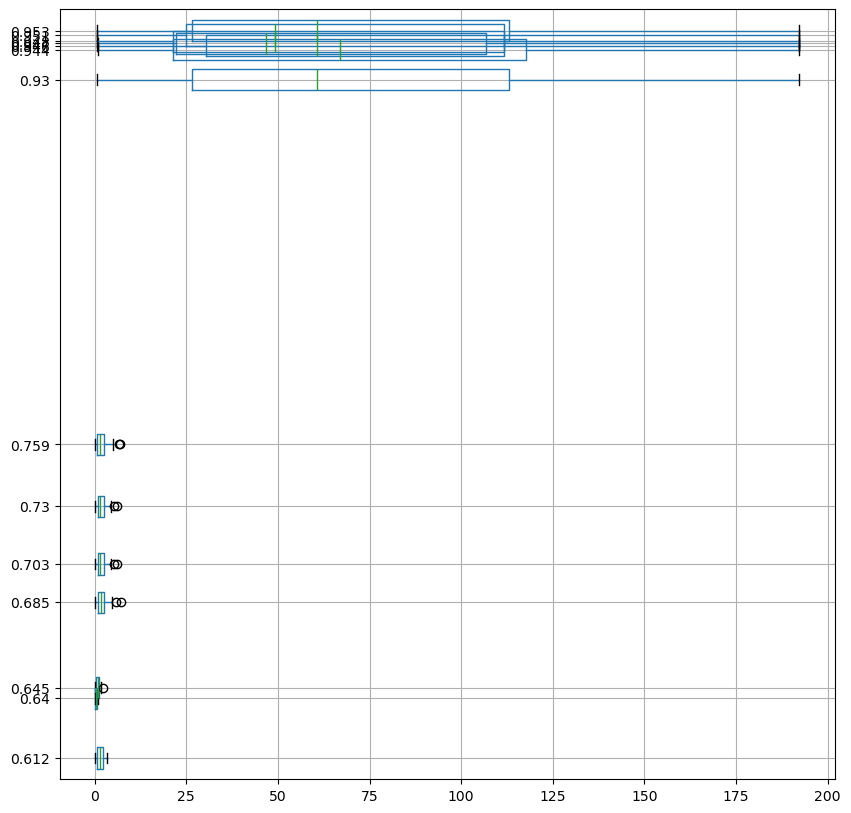

In [65]:
plt.figure(figsize = (10, 10))
pd.DataFrame(KL_data_all, index = df["Quantized Top1 Accuracy"]).T.boxplot(vert = False, positions = df["Quantized Top1 Accuracy"] * 50)

In [66]:
# df["Classes Repeated"] = new_col
# df

In [67]:
df.to_csv("../logs/Quantization_Log_Subsets.csv", index = False)

In [69]:
df = pd.read_csv("../logs/Quantization_Log_Subsets.csv")
df.head()

,Model Name,Dataset,Quantization Batch Size,Original Top1 Accuracy,Quantized Top1 Accuracy,Original Top5 Accuracy,Quantized Top5 Accuracy,Bits,MLP_Alphabet_Scalar,CNN_Alphabet_Scalar,...,Seed,Subset_Inds,Subset_Classes,Max_KL,Min_KL,Avg_KL,Classes Repeated,Trained Top1 Accuracy,Trained Top5 Accuracy,Median_KL
0,vgg16,CIFAR100,64,0.887,0.935,0.989,0.991,4,1.16,1.16,...,0,"[0, 39, 12, 49, 52, 53, 20, 62, 58, 94]","['apple', 'keyboard', 'bridge', 'mountain', 'o...",192.253176,0.844140,68.940139,False,0.982,0.999,66.980437
1,vgg16,CIFAR100,64,0.861,0.902,0.987,0.989,4,1.16,1.16,...,0,"[0, 39, 49, 52, 53, 20, 62, 58, 59, 94]","['apple', 'keyboard', 'mountain', 'oak_tree', ...",192.253176,0.844140,69.604010,False,0.955,0.999,66.877609
2,vgg16,CIFAR100,64,0.884,0.960,0.991,0.996,4,1.16,1.16,...,0,"[0, 39, 71, 49, 52, 53, 20, 62, 58, 94]","['apple', 'keyboard', 'sea', 'mountain', 'oak_...",192.253176,0.544018,73.300755,False,0.975,1.000,66.980437
3,vgg16,CIFAR100,64,0.879,0.953,0.987,0.994,4,1.16,1.16,...,0,"[0, 39, 71, 15, 52, 53, 62, 58, 61, 94]","['apple', 'keyboard', 'sea', 'camel', 'oak_tre...",192.253176,0.844140,68.423650,False,0.988,1.000,50.328013
4,vgg16,CIFAR100,64,0.872,0.952,0.986,0.994,4,1.16,1.16,...,0,"[0, 5, 39, 49, 52, 53, 62, 58, 61, 94]","['apple', 'bed', 'keyboard', 'mountain', 'oak_...",192.253176,0.844140,68.367547,False,0.983,1.000,55.650079


In [28]:
# Plots

In [29]:
from matplotlib import colormaps

cmap = colormaps['rainbow']
cmap(2.5)

(1.0, 1.2246467991473532e-16, 6.123233995736766e-17, 1.0)

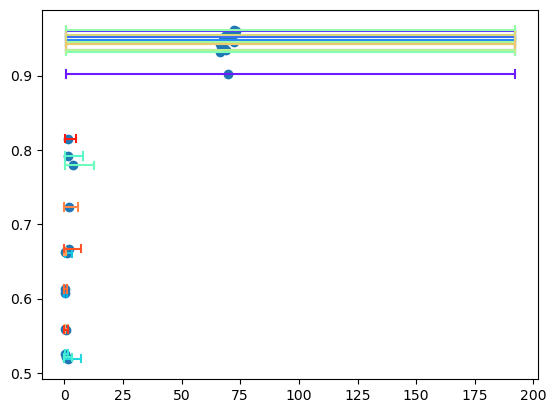

In [30]:
from matplotlib import colormaps

for i in range(df.shape[0]):
    plt.plot(df.iloc[i][["Min_KL", "Max_KL"]], [df.iloc[i]["Quantized Top1 Accuracy"]] * 2, color = cmap(i / df.shape[0]))
    plt.plot([df.iloc[i]["Min_KL"]] * 2, [df.iloc[i]["Quantized Top1 Accuracy"] - 0.005, df.iloc[i]["Quantized Top1 Accuracy"] + 0.005], color = cmap(i / df.shape[0]))
    plt.plot([df.iloc[i]["Max_KL"]] * 2, [df.iloc[i]["Quantized Top1 Accuracy"] - 0.005, df.iloc[i]["Quantized Top1 Accuracy"] + 0.005], color = cmap(i / df.shape[0]))

plt.scatter(df["Avg_KL"], df["Quantized Top1 Accuracy"])

In [31]:
import numpy as np
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return (a * np.log(b * x)) + c

X, y = df["Avg_KL"], df["Quantized Top1 Accuracy"]

coefs, pcov = curve_fit(func, X, y)

fitted_line_1 = []
for i in range(100):
    fitted_line_1 += [func(i, *coefs).item()]

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_213/3828107680.py:5: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


In [32]:
X, y = df["Avg_KL"], df["Original Top1 Accuracy"]

coefs, pcov = curve_fit(func, X, y)

fitted_line_5 = []
for i in range(100):
    fitted_line_5 += [func(i, *coefs).item()]

/tmp/ipykernel_213/3828107680.py:5: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


In [33]:
X, y = df["Avg_KL"], df["Trained Top1 Accuracy"]

coefs, pcov = curve_fit(func, X, y)

fitted_line_ = []
for i in range(100):
    fitted_line_ += [func(i, *coefs).item()]

/tmp/ipykernel_213/3828107680.py:5: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


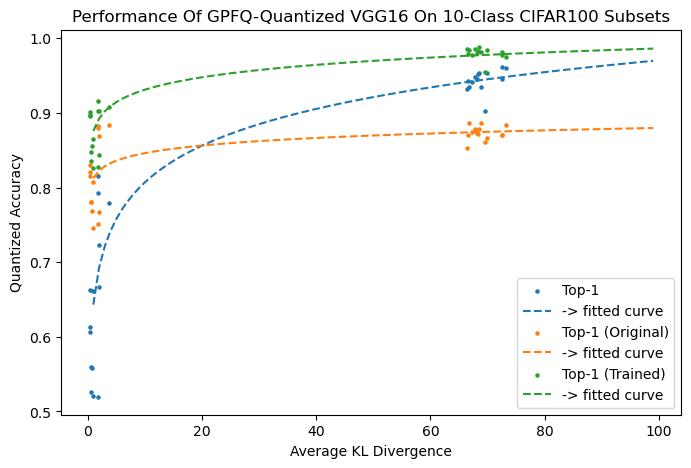

In [34]:
plt.figure(figsize = (8, 5))
plt.scatter(df["Avg_KL"], df["Quantized Top1 Accuracy"], s = 5)
plt.plot(range(len(fitted_line_1)), fitted_line_1, '--')
plt.scatter(df["Avg_KL"], df["Original Top1 Accuracy"], s = 5)
plt.plot(range(len(fitted_line_5)), fitted_line_5, '--')
plt.scatter(df["Avg_KL"], df["Trained Top1 Accuracy"], s = 5)
plt.plot(range(len(fitted_line_)), fitted_line_, '--')
plt.xlabel("Average KL Divergence")
plt.ylabel("Quantized Accuracy")
plt.title("Performance Of GPFQ-Quantized VGG16 On 10-Class CIFAR100 Subsets", fontsize = 12)
leg = plt.legend(["Top-1", "-> fitted curve", "Top-1 (Original)", "-> fitted curve",  "Top-1 (Trained)", "-> fitted curve"])
plt.savefig("./imgs/vgg16.png")

In [35]:
import numpy as np
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return (a * np.log(b * x)) + c

X, y = df["Median_KL"], df["Quantized Top1 Accuracy"]

coefs, pcov = curve_fit(func, X, y)

fitted_line_1 = []
for i in range(80):
    fitted_line_1 += [func(i, *coefs).item()]

/tmp/ipykernel_213/1040412974.py:5: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


In [36]:
X, y = df["Median_KL"], df["Original Top1 Accuracy"]

coefs, pcov = curve_fit(func, X, y)

fitted_line_5 = []
for i in range(80):
    fitted_line_5 += [func(i, *coefs).item()]

/tmp/ipykernel_213/1040412974.py:5: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


In [37]:
X, y = df["Median_KL"], df["Trained Top1 Accuracy"]

coefs, pcov = curve_fit(func, X, y)

fitted_line_ = []
for i in range(80):
    fitted_line_ += [func(i, *coefs).item()]

/tmp/ipykernel_213/1040412974.py:5: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


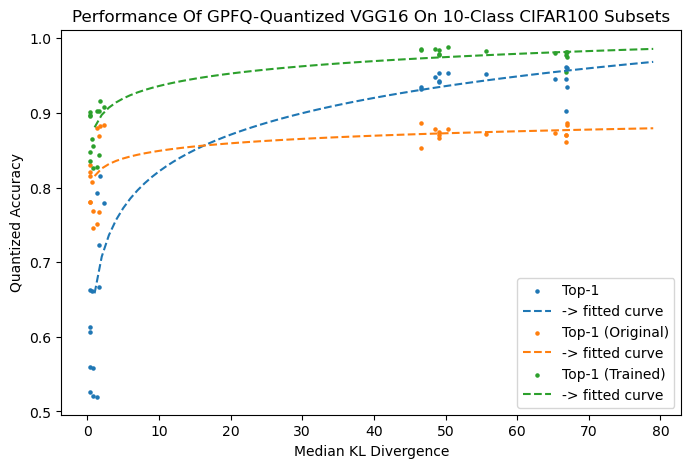

In [38]:
plt.figure(figsize = (8, 5))
plt.scatter(df["Median_KL"], df["Quantized Top1 Accuracy"], s = 5)
plt.plot(range(len(fitted_line_1)), fitted_line_1, '--')
plt.scatter(df["Median_KL"], df["Original Top1 Accuracy"], s = 5)
plt.plot(range(len(fitted_line_5)), fitted_line_5, '--')
plt.scatter(df["Median_KL"], df["Trained Top1 Accuracy"], s = 5)
plt.plot(range(len(fitted_line_)), fitted_line_, '--')
plt.xlabel("Median KL Divergence")
plt.ylabel("Quantized Accuracy")
plt.title("Performance Of GPFQ-Quantized VGG16 On 10-Class CIFAR100 Subsets", fontsize = 12)
leg = plt.legend(["Top-1", "-> fitted curve", "Top-1 (Original)", "-> fitted curve",  "Top-1 (Trained)", "-> fitted curve"])
plt.savefig("./imgs/vgg16_median.png")